In [11]:
# data analysis for self-piloting the PLEARN eyetracking experiment

In [12]:
library('readr')
library('blabr')
library('plyr')
library('dplyr')
library('ggplot2')
library('rjson')
library('parallel')
library("readxl")
source('PLEARN_analysis_helper.R')

In [13]:
audio_timings = getAudioTimings("~/notebooks/morphoacq/PLEARN_experiments/stimuli/raw_audio2/*.cut")
head(audio_timings)

start_time stop_time target_noun_start_time begin_disambig_region
1  3.199      5.300     4.085                  4.366               
2  8.912     10.731     9.538                  9.827               
3 14.222     15.929    14.736                 15.130               
4 19.494     21.586    20.454                 20.729               
5 32.459     34.185    33.174                 33.438               
6 37.722     39.242    38.219                 38.500               
  target_noun_end_time filename disambig_time audiotarget
1  4.366               17.wav   3167          17.wav     
2  9.827               18.wav   2915          18.wav     
3 15.130               19.wav   2908          19.wav     
4 20.729               20.wav   3235          20.wav     
5 33.438               21.wav   2979          21.wav     
6 38.500               22.wav   2778          22.wav

In [14]:
# merge against item properties
item_properties = read.csv('../PLEARN_experiments/csv/plearn_receptiveTask_datasource.csv')
item_properties[1,]
audio_timings_with_metadata = merge(item_properties, audio_timings, by.x='AudioTarget', 
                                    by.y='audiotarget')
audio_timings_with_metadata$plural_duration = (audio_timings_with_metadata$target_noun_end_time -
    audio_timings_with_metadata$begin_disambig_region) * 1000 
nrow(audio_timings_with_metadata) # should be 64, right?

s_form novel_id background_context vowel_carrier
1 book   !        house               in the house
  full_carrier                   s_carrier         s_punct s_wav_index
1 Can you find the  in the house Can you find the  ?       65         
  s_sentence                                      pl_form ⋯ TargetSide
1 65. book... Can you find the book in the house? books   ⋯ NA        
  trial_index NovelColor order expt_index TargetLoc DistractorLoc AudioTarget
1 NA          NA         1     1          (640,512) (0,0)         65.wav     
  TargetImage              DistractorImage       
1 1_book_singular_left.png 1_book_plural_left.png

[1] 63

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


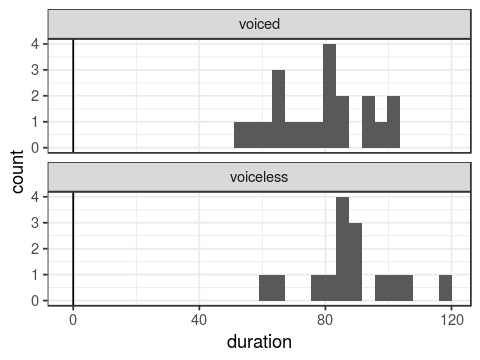

In [15]:
options(repr.plot.width=4, repr.plot.height=3)
ggplot(subset(audio_timings_with_metadata, plural_duration != 0)) + geom_histogram(aes(x=plural_duration)
) + facet_wrap(~voicing, ncol=1) + theme_bw() + geom_vline(xintercept=0) +xlab('duration')

# Eyetracking: Individual Participants

In [153]:
#Fixme -- need an iterator
source('PLEARN_analysis_helper.R')
sm_fixbins= analyzeParticipant('results/smflip3_fixreport.txt', audio_timings, 'adult')
pl00_fixbins = analyzeParticipant('results/pl00_fixations.txt', audio_timings, 'child')
pl01_fixbins = analyzeParticipant('results/pl01_fixations.txt', audio_timings, 'child')
pl03_fixbins = analyzeParticipant('results/pl03_fixations.txt', audio_timings, 'child')
pl06_fixbins = analyzeParticipant('results/pl06_fixations.txt', audio_timings, 'adult')
pl07_fixbins = analyzeParticipant('results/pl07_fixations.txt', audio_timings, 'adult')
pl08_fixbins = analyzeParticipant('results/pl08_fixations.txt', audio_timings, 'adult')
pl09_fixbins = analyzeParticipant('results/pl09_fixations.txt', audio_timings, 'child')
pl10_fixbins = analyzeParticipant('results/pl10_fixations.txt', audio_timings, 'child')
pl11_fixbins = analyzeParticipant('results/pl11_fixations.txt', audio_timings, 'child')
#Irene saw pl11 as the last child and assigned pl12, after I had run 4 pilot adults
# pl12, the child, was a no show
adultpilot_pl12_fixbins = analyzeParticipant('results/adultpilot_pl12_fixations.txt', audio_timings, 'adult')
adultpilot_pl13_fixbins = analyzeParticipant('results/adultpilot_pl13_fixations.txt', audio_timings, 'adult')
adultpilot_pl14_fixbins = analyzeParticipant('results/adultpilot_pl14_fixations.txt', audio_timings, 'adult')
adultpilot_pl15_fixbins = analyzeParticipant('results/adultpilot_pl15_fixations.txt', audio_timings, 'adult')
adultpilot_pl16_fixbins = analyzeParticipant('results/adultpilot_pl16_fixations.txt', audio_timings, 'adult')
pl13_fixbins = analyzeParticipant('results/pl13_fixations.xlsx', audio_timings,  'child')
pl14_fixbins = analyzeParticipant('results/pl14_fixations.xlsx', audio_timings,  'child')
pl15_fixbins = analyzeParticipant('results/pl15_fixations.xlsx', audio_timings,  'child')
pl16_fixbins = analyzeParticipant('results/pl16_fixations.xlsx', audio_timings,  'child')
pl17_fixbins = analyzeParticipant('results/pl17_fixations.xlsx', audio_timings,  'child')
pl18_fixbins = analyzeParticipant('results/pl18_fixations.xlsx', audio_timings,  'child')
pl19_fixbins = analyzeParticipant('results/pl19_fixations.xlsx', audio_timings,  'child')

Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 13104, not 13103”Parsed with column specification:
cols(
  .default = col_chara

See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 7542, not 7541”Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“

[1] "Dimensions of excel file read in:"
[1] 608
[1] "will write to:"
[1] "results/pl13_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 10705, not 10704”

[1] "Dimensions of excel file read in:"
[1] 520
[1] "will write to:"
[1] "results/pl14_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 12993, not 12992”

[1] "Dimensions of excel file read in:"
[1] 725
[1] "will write to:"
[1] "results/pl15_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 11974, not 11973”

[1] "Dimensions of excel file read in:"
[1] 681
[1] "will write to:"
[1] "results/pl16_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14993, not 14992”

[1] "Dimensions of excel file read in:"
[1] 599
[1] "will write to:"
[1] "results/pl17_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 10580, not 10579”

[1] "Dimensions of excel file read in:"
[1] 748
[1] "will write to:"
[1] "results/pl18_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14385, not 14384”

[1] "Dimensions of excel file read in:"
[1] 546
[1] "will write to:"
[1] "results/pl19_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 13635, not 13634”

# Collection of Fixbins

In [154]:
fixbin_dfs = list(pl06_fixbins, sm_fixbins, pl07_fixbins, 
    pl08_fixbins, pl00_fixbins, pl03_fixbins, pl09_fixbins, pl10_fixbins, pl11_fixbins,
                 adultpilot_pl12_fixbins, adultpilot_pl13_fixbins, adultpilot_pl14_fixbins, 
                adultpilot_pl15_fixbins, adultpilot_pl16_fixbins, pl13_fixbins,
                 pl14_fixbins, pl15_fixbins, pl16_fixbins,
                 pl17_fixbins, pl18_fixbins, pl19_fixbins)

adult_fixbin_dfs = list(pl06_fixbins, sm_fixbins, pl07_fixbins, 
    pl08_fixbins, pl12_fixbins, adultpilot_pl13_fixbins, adultpilot_pl14_fixbins, 
    adultpilot_pl15_fixbins, adultpilot_pl16_fixbins)
child_fixbins =  list(pl00_fixbins, pl03_fixbins, 
    pl09_fixbins, pl11_fixbins, pl13_fixbins, pl14_fixbins, pl15_fixbins, pl16_fixbins,
                     pl17_fixbins, pl18_fixbins, pl19_fixbins)

nonconv_child_fixbins = list(pl10_fixbins) # only one right now; pl04 only did the productive task

In [155]:
audio_timings$pp_duration = audio_timings$stop_time - audio_timings$target_noun_end_time

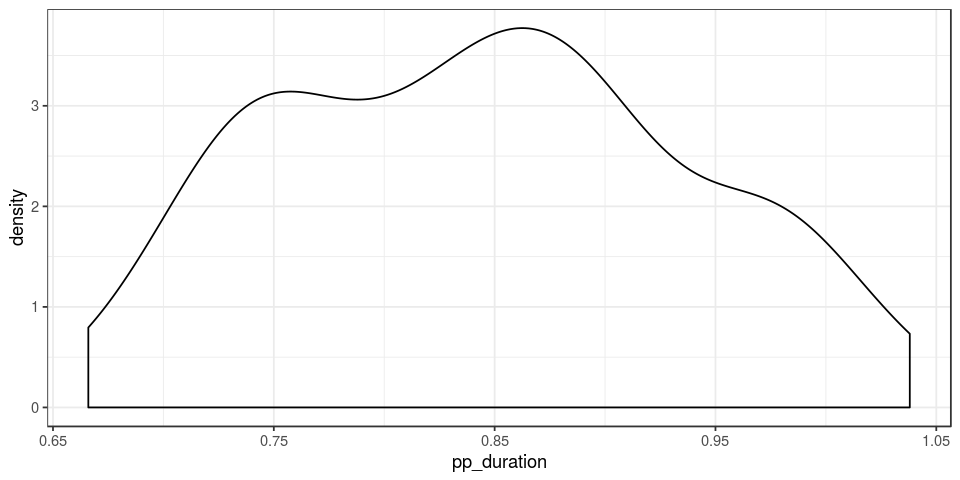

In [156]:
mean_pp_duration= mean(audio_timings$pp_duration, na.rm=T) * 1000
ggplot(audio_timings) + geom_density(aes(x=pp_duration)) + theme_bw()

 [1] "timeBin"                         "FixationID"                     
 [3] "TRIAL_INDEX"                     "RECORDING_SESSION_LABEL"        
 [5] "CURRENT_FIX_INTEREST_AREA_LABEL" "RT"                             
 [7] "expt_index"                      "target"                         
 [9] "s_form"                          "novelty"                        
[11] "animacystatus"                   "voicing"                        
[13] "practice"                        "Time"                           
[15] "Nonset"                          "participant_type"               
[17] "participant_name"                "label_at_onset"                 
[19] "time_to_last_nonna"              "track_loss_at_0"                
[21] "cfial_bin"                      


`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
“Removed 4 rows containing missing values (geom_errorbar).”`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
“Removed 6 rows containing missing values (geom_errorbar).”

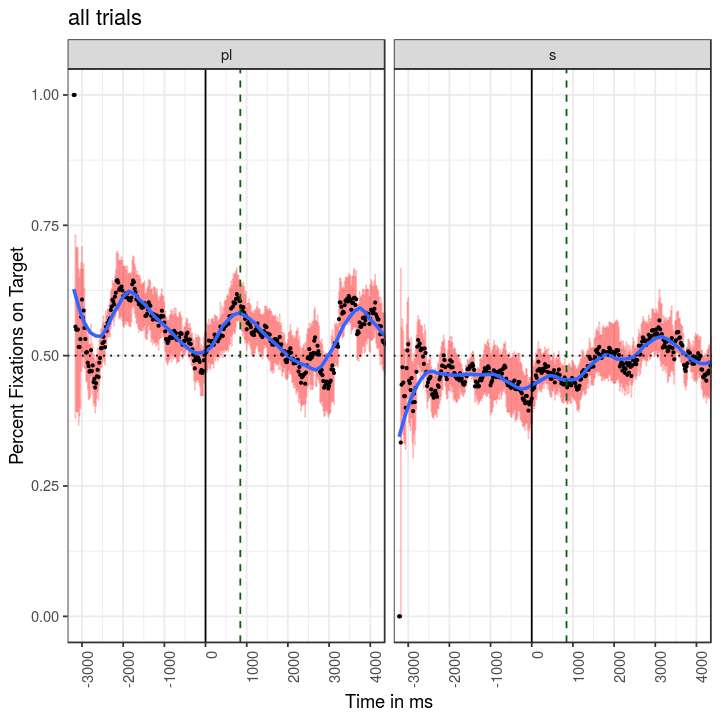

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
“Removed 4 rows containing missing values (geom_errorbar).”

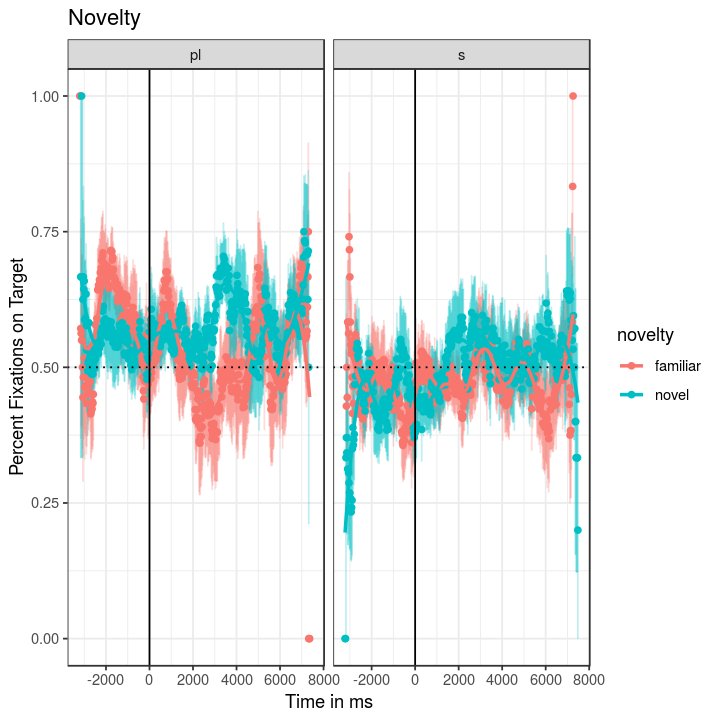

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
“Removed 6 rows containing missing values (geom_errorbar).”Coordinate system already present. Adding new coordinate system, which will replace the existing one.


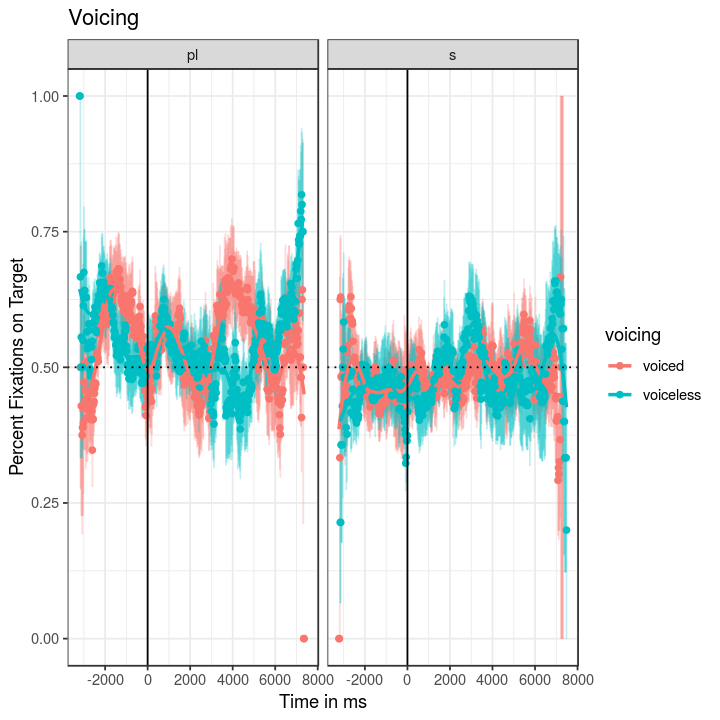

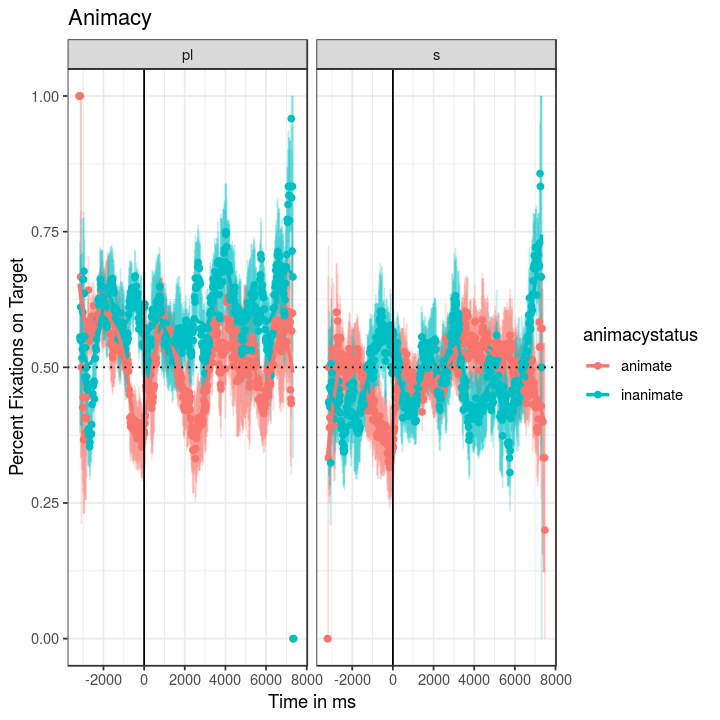

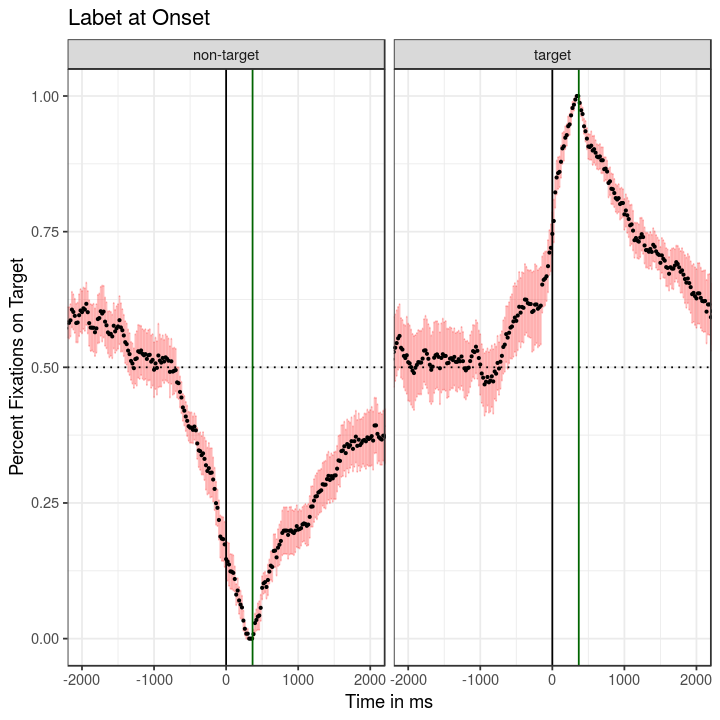

In [158]:
source('PLEARN_analysis_helper.R')
options(repr.plot.width=6, repr.plot.height=6)
child_group_plots = getGroupPlots(child_fixbins,groupByParticipant=T, mean_pp_duration= mean_pp_duration)

 [1] "timeBin"                         "FixationID"                     
 [3] "TRIAL_INDEX"                     "RECORDING_SESSION_LABEL"        
 [5] "CURRENT_FIX_INTEREST_AREA_LABEL" "RT"                             
 [7] "expt_index"                      "target"                         
 [9] "s_form"                          "novelty"                        
[11] "animacystatus"                   "voicing"                        
[13] "practice"                        "Time"                           
[15] "Nonset"                          "participant_type"               
[17] "participant_name"                "label_at_onset"                 
[19] "time_to_last_nonna"              "track_loss_at_0"                
[21] "cfial_bin"                      


`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

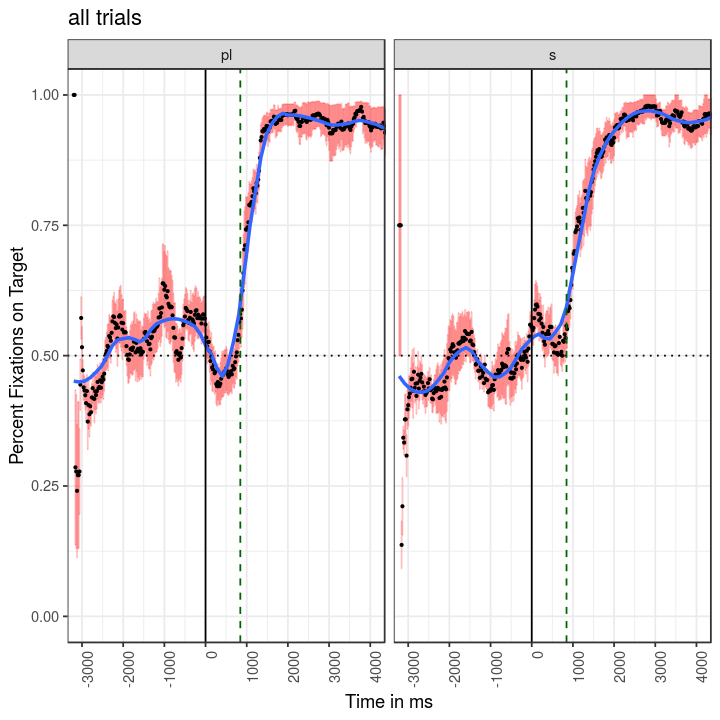

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

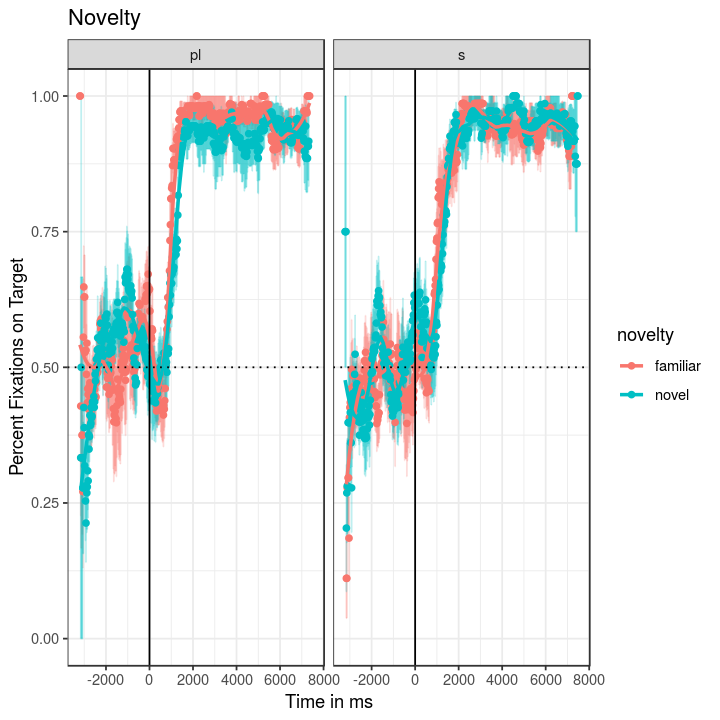

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Coordinate system already present. Adding new coordinate system, which will replace the existing one.


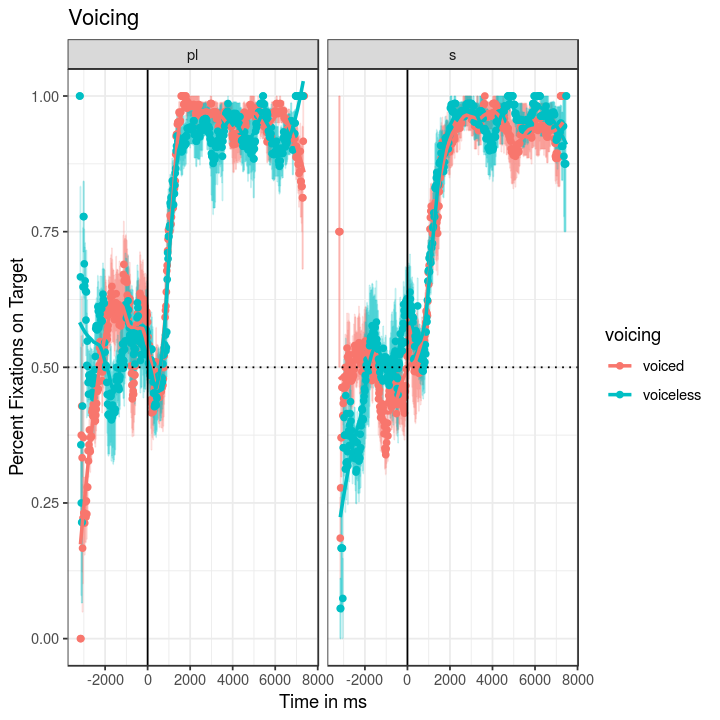

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

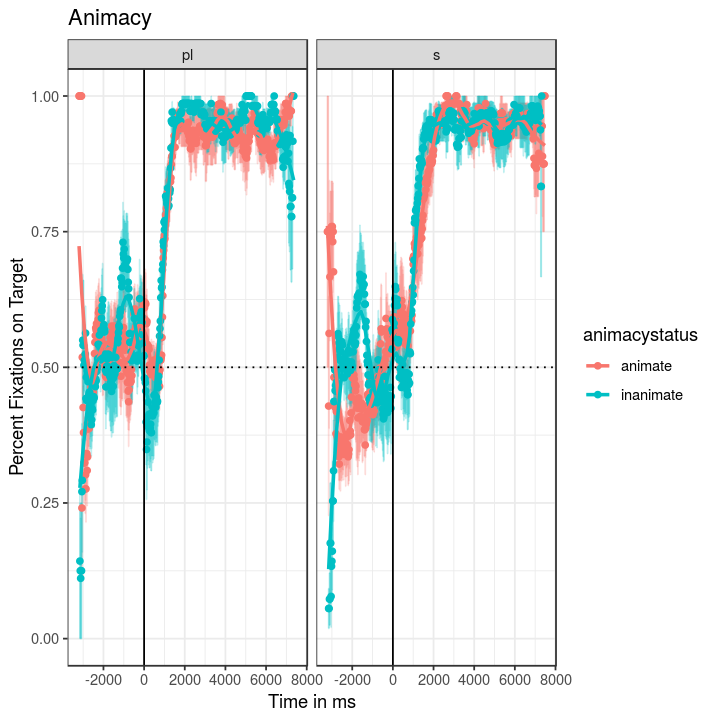

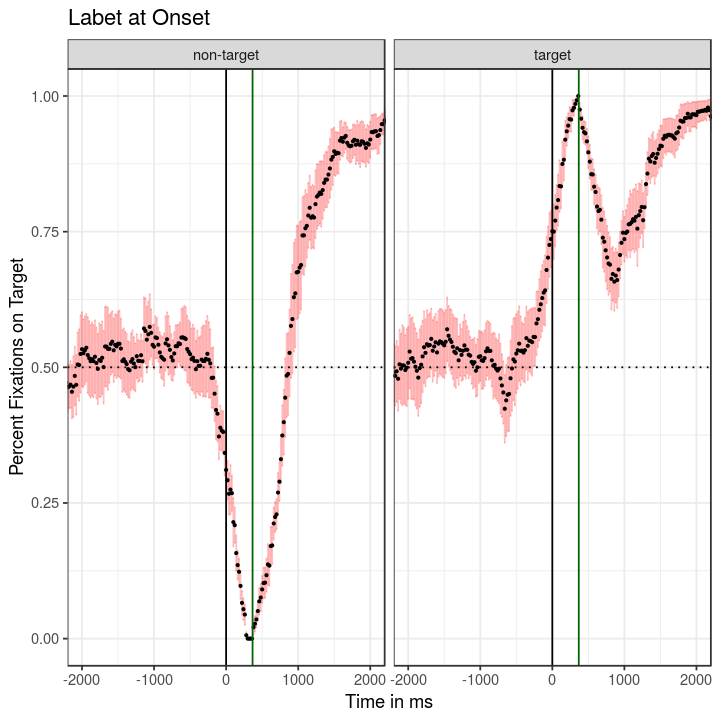

In [159]:
source('PLEARN_analysis_helper.R')
options(repr.plot.width=6, repr.plot.height=6)
adult_fixbins_coded = getGroupPlots(adult_fixbin_dfs,groupByParticipant=T, mean_pp_duration= mean_pp_duration)

In [ ]:
# if are looking at the distractor, know you are wrong -- switch to the right thing
# reverse sharkfin: if already looking at the target, check out the other because it could be better

In [50]:
names(adult_fixbins_coded)

[1] "timeBin"                         "FixationID"                     
 [3] "TRIAL_INDEX"                     "RECORDING_SESSION_LABEL"        
 [5] "CURRENT_FIX_INTEREST_AREA_LABEL" "RT"                             
 [7] "expt_index"                      "target"                         
 [9] "s_form"                          "novelty"                        
[11] "animacystatus"                   "voicing"                        
[13] "practice"                        "Time"                           
[15] "Nonset"                          "participant_type"               
[17] "participant_name"                "label_at_onset"                 
[19] "time_to_last_nonna"              "track_loss_at_0"                
[21] "cfial_bin"

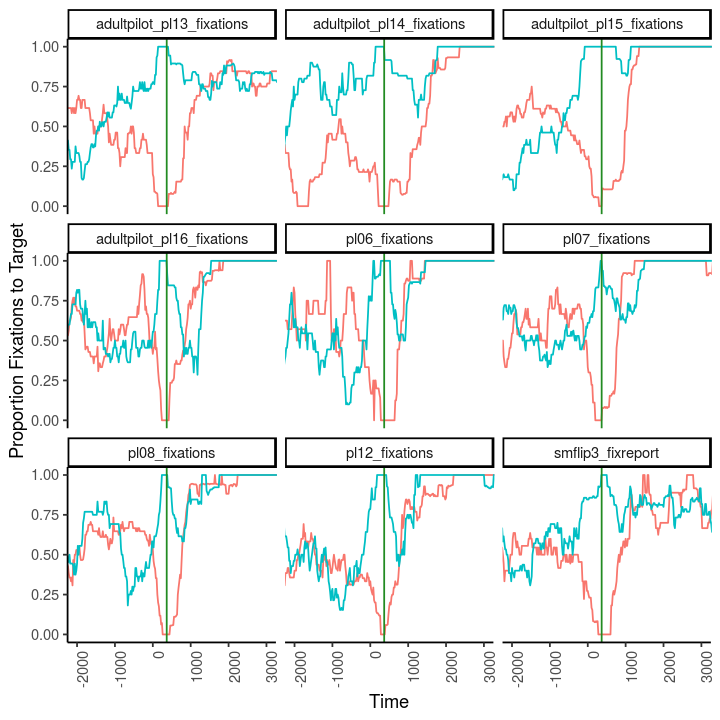

In [51]:
participant_onset = aggregate(cfial_bin ~ Time + participant_name + label_at_onset, adult_fixbins_coded, mean)

ggplot(participant_onset) + geom_line(aes(x=Time, y=cfial_bin, colour=label_at_onset)
) + facet_wrap(~participant_name) + theme_classic() + ylab(
    'Proportion Fixations to Target') + theme(legend.position="none",
            axis.text.x = element_text(angle = 90, hjust = 1)
) + coord_cartesian(xlim=c(-2000, 3000)) + geom_vline(xintercept=367, 
    colour='forestgreen')

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


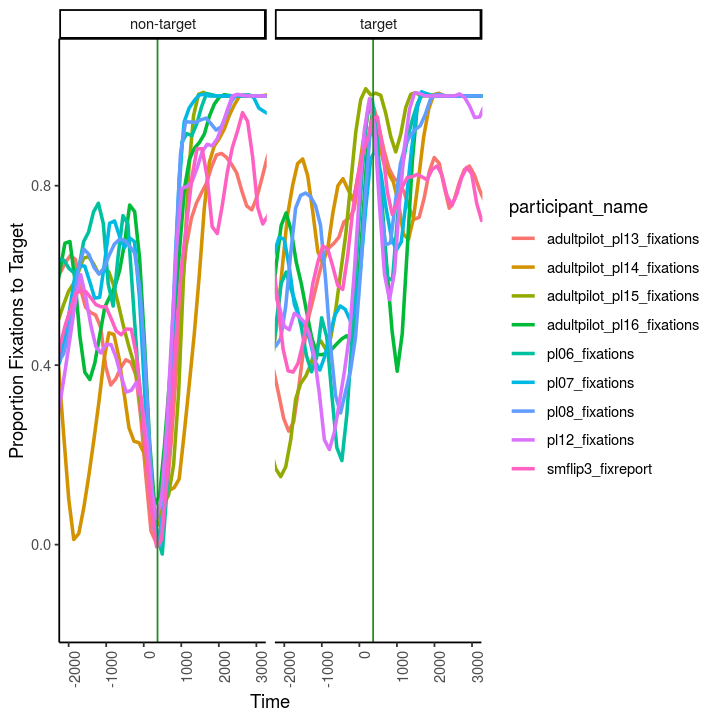

In [52]:
ggplot(participant_onset) + geom_smooth(aes(x=Time, y=cfial_bin, 
colour=participant_name), span=.1, se=F
) + facet_wrap(~label_at_onset) + theme_classic() + ylab(
    'Proportion Fixations to Target') + theme(
            axis.text.x = element_text(angle = 90, hjust = 1)
) + coord_cartesian(xlim=c(-2000, 3000)) + geom_vline(xintercept=367, 
    colour='forestgreen')

Everyone checks out the other thing, some people continue to look at it

# Participant Receptive Scores

In [160]:
source('PLEARN_analysis_helper.R')
test_participant_receptive_knowledge(pl08_fixbins,normalizeMethod = 'none')

participant_type contrast_type prob         prop_looks_to_target
1 adult            4-way         1.445313e-01 0.6970452           
2 adult            4-way         3.906250e-03 0.8131766           
3 adult            4-way         3.906250e-03 0.8274424           
4 adult            4-way         3.906250e-03 0.8513579           
5 adult            2-way         2.090454e-03 0.7551109           
6 adult            2-way         1.525879e-05 0.8394002           
7 adult            2-way         2.090454e-03 0.7622438           
8 adult            2-way         1.525879e-05 0.8322673           
9 adult            1-way         1.231674e-07 0.7972555           
  thresholded                partition_name            normalizeMethod
1 Unclear ( .05 < p < .33)   4-way: familiar-voiced    none           
2 Demonstrates RK! (p < .05) 4-way: familiar-voiceless none           
3 Demonstrates RK! (p < .05) 4-way: novel-voiced       none           
4 Demonstrates RK! (p < .05) 4-way: novel-voiceless    none           
5 Demonstrates RK! (p < .05) 2-way: familiar           none           
6 Demonstrates RK! (p < .05) 2-way: novel              none           
7 Demonstrates RK! (p < .05) 2-way: voiced             none           
8 Demonstrates RK! (p < .05) 2-way: voiceless          none           
9 Demonstrates RK! (p < .05) 1-way: All                none

In [161]:
normalizeMethods = c('none','yoked','preceding')
all_scores = do.call('rbind', lapply(normalizeMethods, function(normalizeMethod){
    do.call('rbind', lapply(fixbin_dfs, function(fixbin_df){
        test_participant_receptive_knowledge(fixbin_df, normalizeMethod, end_analysis_window= 2500)
    }))    
}))

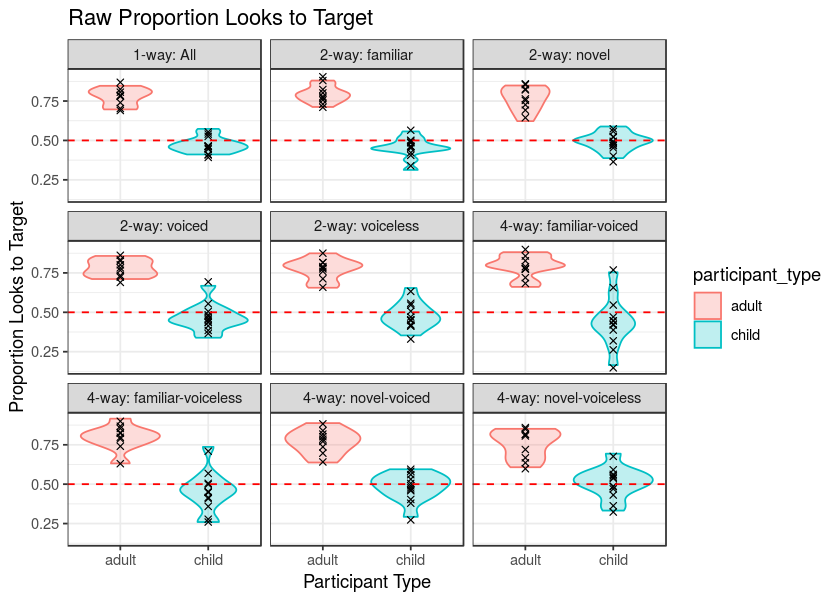

In [162]:
options(repr.plot.width=7, repr.plot.height=5)
ggplot(subset(all_scores, normalizeMethod == 'none')) + geom_violin(
aes(y=prop_looks_to_target, x = participant_type,
colour = participant_type, fill = participant_type), alpha=.25) +
geom_point(aes(x=participant_type, y=prop_looks_to_target), colour ='black',
shape = 4, position=position_jitter(height=.03, width=0)) + facet_wrap(
~partition_name) + theme_bw() + geom_hline(yintercept=.5, 
linetype = 'dashed', colour='red') + ggtitle('Raw Proportion Looks to Target'
) + xlab('Participant Type') + ylab('Proportion Looks to Target') 

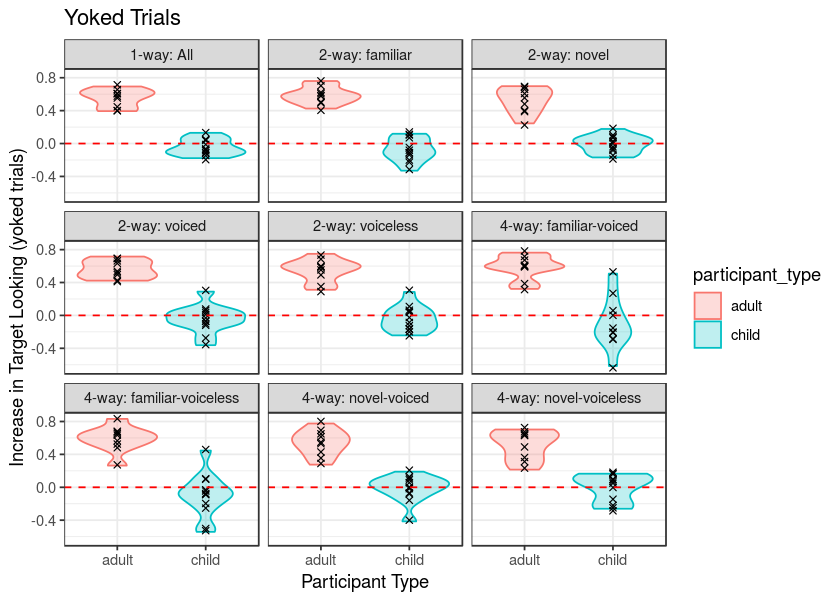

In [163]:
options(repr.plot.width=7, repr.plot.height=5)
ggplot(subset(all_scores, normalizeMethod == 'yoked')) + geom_violin(
aes(y=prop_looks_to_target, x = participant_type,
colour = participant_type, fill = participant_type), alpha=.25) +
geom_point(aes(x=participant_type, y=prop_looks_to_target), colour ='black',
shape = 4, position=position_jitter(height=.03, width=0)) + facet_wrap(
~partition_name) + theme_bw() + geom_hline(yintercept=0, 
linetype = 'dashed', colour='red') + ggtitle('Yoked Trials'
) + xlab('Participant Type') + ylab('Increase in Target Looking (yoked trials)') 

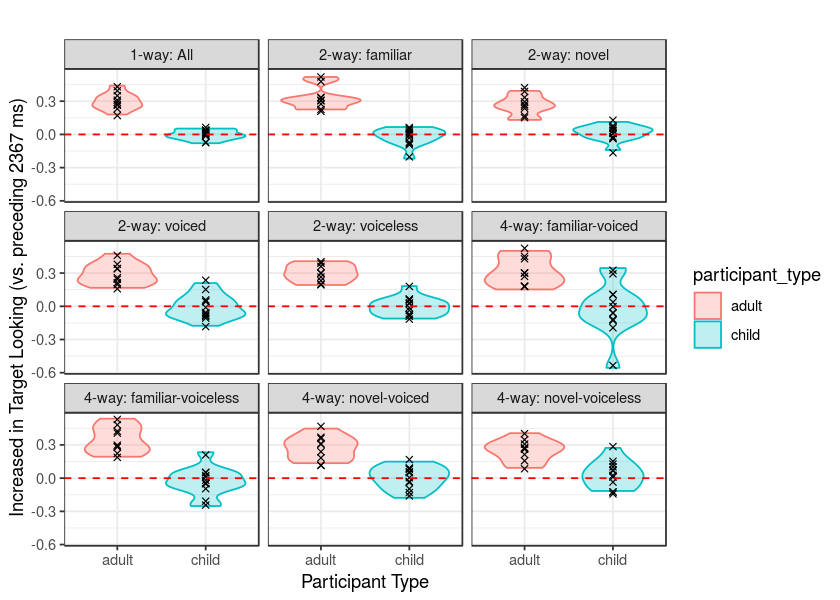

In [164]:
options(repr.plot.width=7, repr.plot.height=5)
ggplot(subset(all_scores, normalizeMethod == 'preceding')) + geom_violin(
aes(y=prop_looks_to_target, x = participant_type,
colour = participant_type, fill = participant_type), alpha=.25) +
geom_point(aes(x=participant_type, y=prop_looks_to_target), position=position_jitter(
height=.03, width=0), colour ='black', shape = 4) + facet_wrap(
~partition_name) + theme_bw() + geom_hline(yintercept=0, 
linetype = 'dashed', colour='red') + ggtitle(''
) + xlab('Participant Type') + ylab('Increased in Target Looking (vs. preceding 2367 ms)') 

# Binomial Test Exploration

In [61]:
pl06_fixbins$is_looking_at_target  = as.numeric(pl06_fixbins$CURRENT_FIX_INTEREST_AREA_LABEL == 'TARGET')

[1] 213840


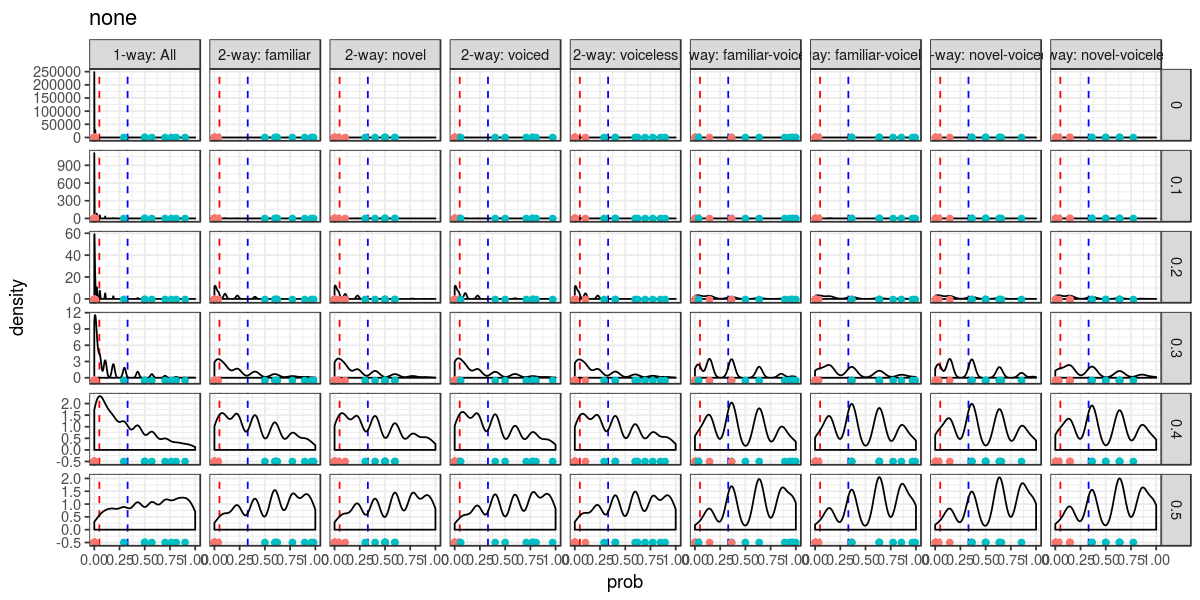

In [62]:
# takes a long time to run because of the bootstrapping
source('PLEARN_analysis_helper.R')
rlist = getPlotForMethod(fixbin_dfs, adult_fixbin_dfs, 'none')
options(repr.plot.width=10, repr.plot.height=5)
print(rlist$p1)
ggsave('figures/binomialTest_nopreprocessing.pdf', width=20, height=10)

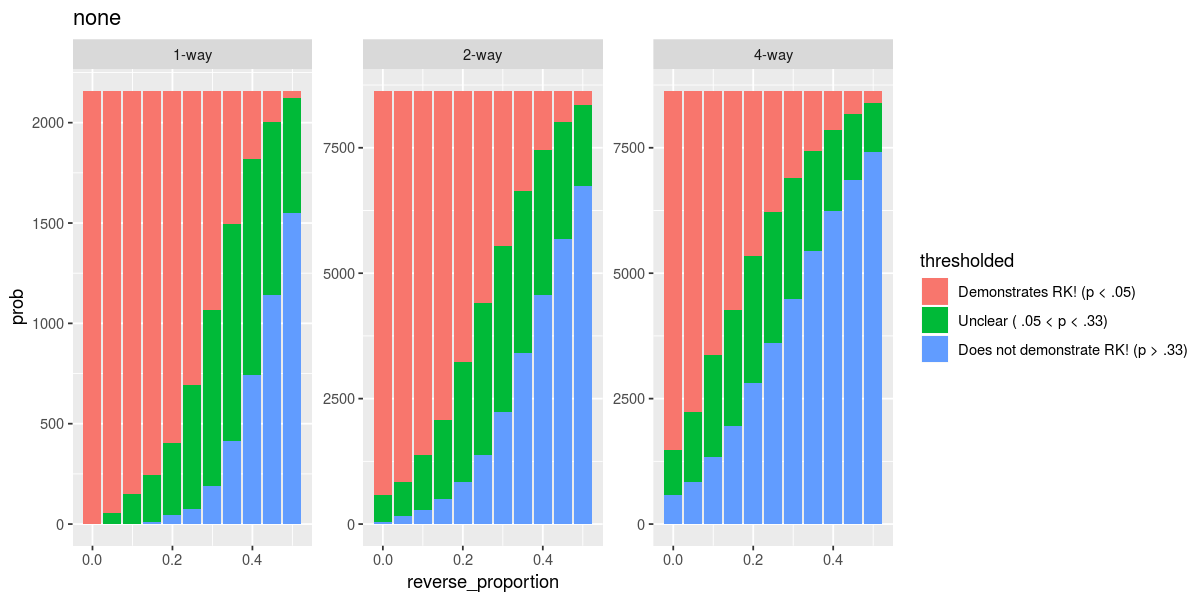

In [63]:
print(rlist$p2)

False negative rate around .1 on 2-way contrasts when halfway between adult-like knowledge and zero knowledge

False positve rate of around .02 on 1-way contrasts when zero-knowledge


[1] 213840


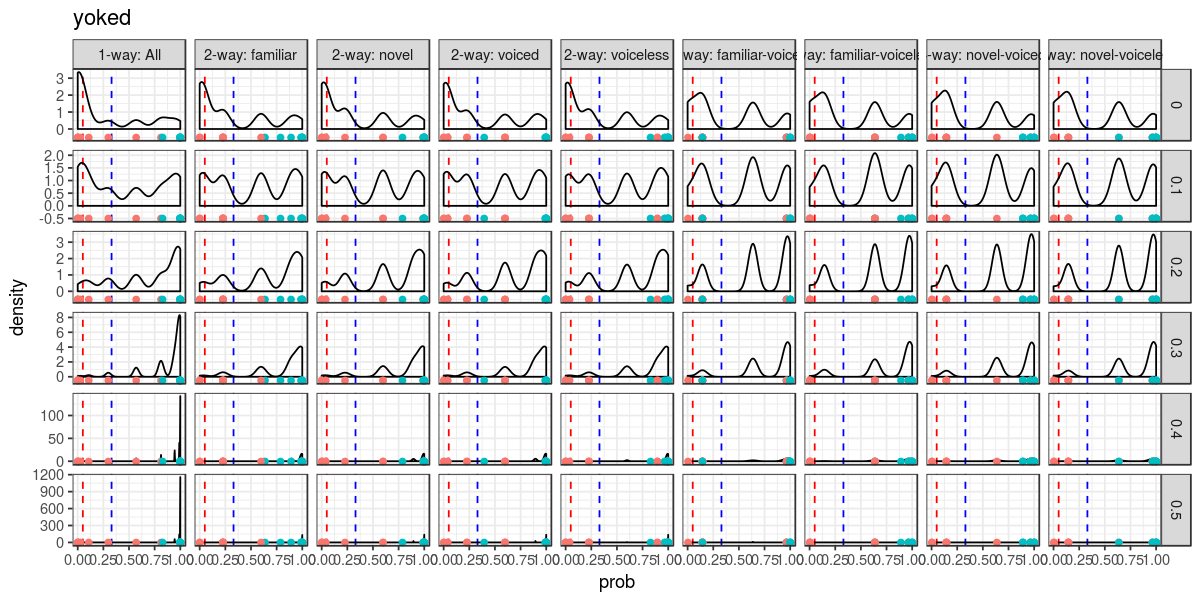

In [64]:
# takes a long time to run because of the bootstrapping
sim_yoked = getPlotForMethod(fixbin_dfs,adult_fixbin_dfs, 'yoked')
options(repr.plot.width=10, repr.plot.height=5)
print(sim_yoked$p1)
ggsave('figures/binomialTest_yoked.pdf', width=20, height=10)

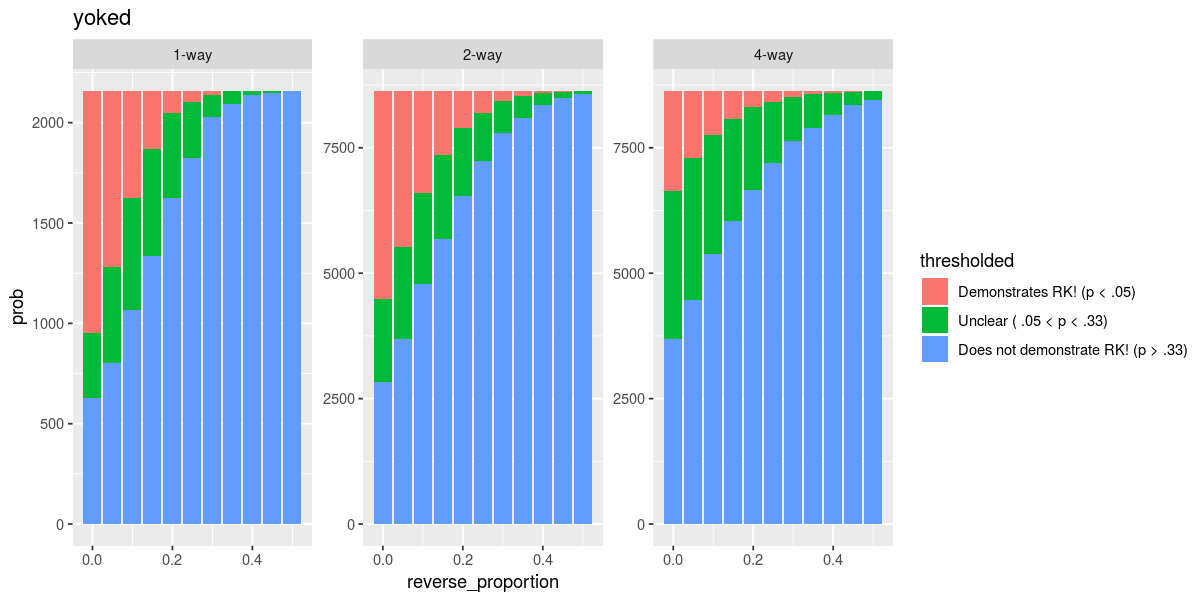

In [65]:
sim_yoked$p2

[1] 213840


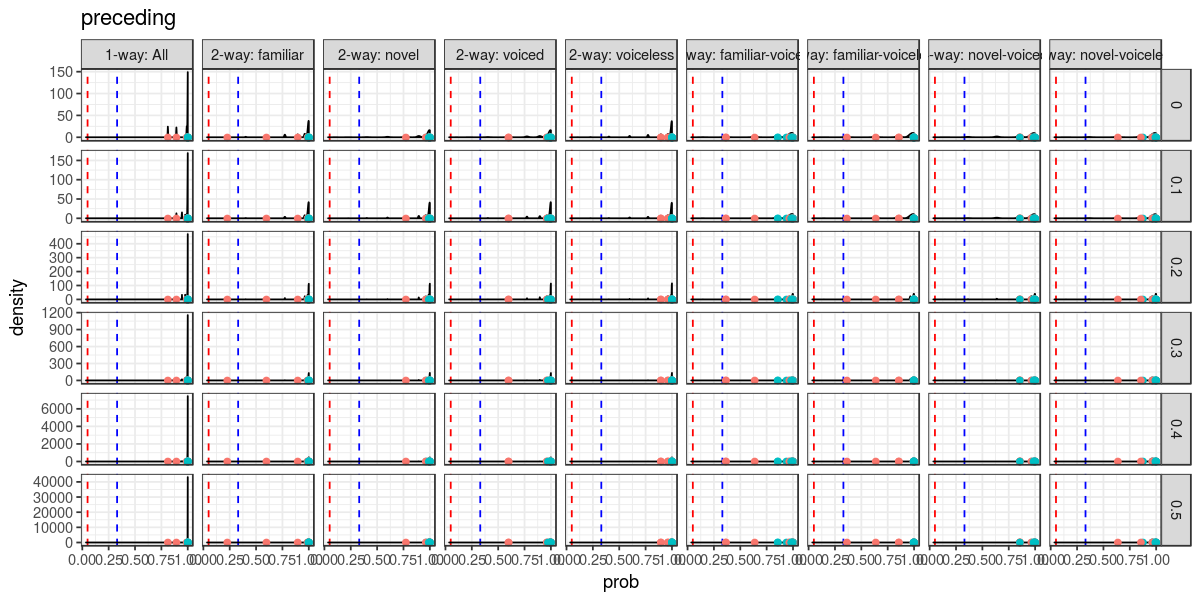

In [66]:
# takes a long time to run because of the bootstrapping
sim_preceding = getPlotForMethod(fixbin_dfs,adult_fixbin_dfs, 'preceding')
options(repr.plot.width=10, repr.plot.height=5)
print(sim_preceding$p1)
ggsave('figures/binomialTest_preceding.pdf', width=20, height=10)

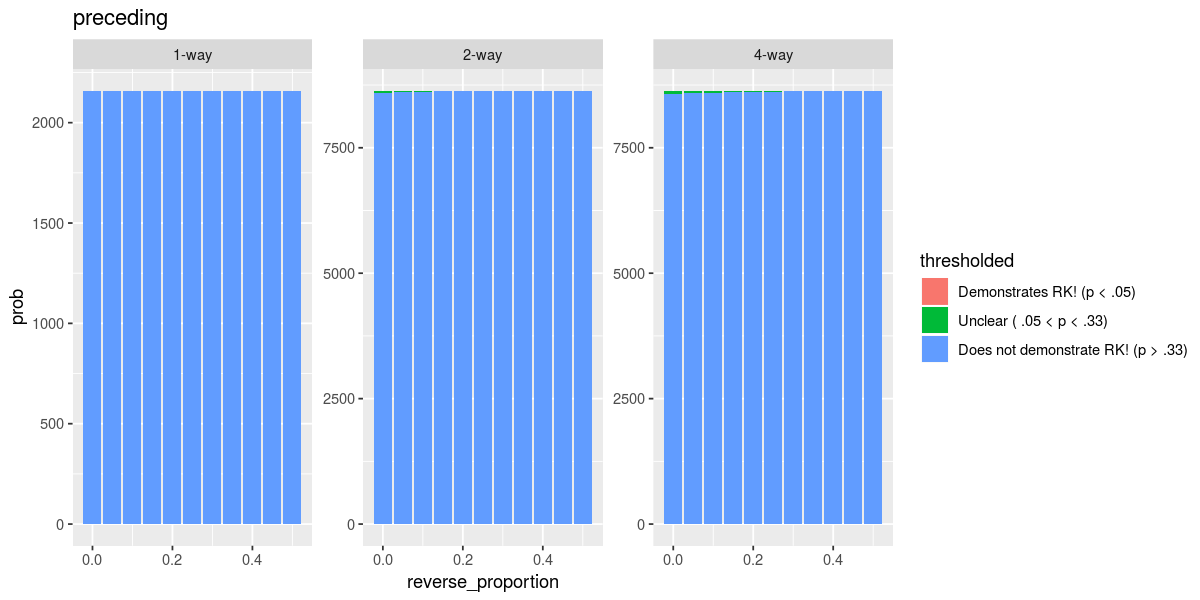

In [67]:
sim_preceding$p2

# Experimental Plot Types

In [135]:
fixreport_path = 'results/smflip3_fixreport.txt'
participant_name = gsub('.txt','',tail(strsplit(fixreport_path, '/')[[1]]))[2]

gaze = blabr::fixations_report(fixreport_path)
gaze = merge(gaze, audio_timings[,c('audiotarget','disambig_time')])
gaze$CURRENT_FIX_END = gaze$CURRENT_FIX_END - gaze$disambig_time
gaze$CURRENT_FIX_START = gaze$CURRENT_FIX_START - gaze$disambig_time

fixbins = binifyFixations(gaze, keepCols=c("RECORDING_SESSION_LABEL",
"CURRENT_FIX_INTEREST_AREA_LABEL",
"RT",
"expt_index",
"target",
"s_form",
"novelty",
"animacystatus",
"voicing"))
subset(fixbins, Time==3200)

Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 13104, not 13103”

timeBin FixationID RECORDING_SESSION_LABEL CURRENT_FIX_INTEREST_AREA_LABEL
1  160      32        flipsm                  DISTRACTOR                     
2  160      53        flipsm                  DISTRACTOR                     
3  160      68        flipsm                  TARGET                         
4  160      89        flipsm                  DISTRACTOR                     
5  160     155        flipsm                  TARGET                         
6  160     173        flipsm                  TARGET                         
7  160     193        flipsm                  TARGET                         
8  160     212        flipsm                  TARGET                         
9  160     224        flipsm                  TARGET                         
10 160     234        flipsm                  TARGET                         
11 160     246        flipsm                  TARGET                         
12 160     266        flipsm                  DISTRACTOR                     
13 160     308        flipsm                  TARGET                         
14 160     331        flipsm                  TARGET                         
15 160     348        flipsm                  DISTRACTOR                     
16 160     367        flipsm                  TARGET                         
17 160     381        flipsm                  TARGET                         
18 160     402        flipsm                  TARGET                         
19 160     417        flipsm                  TARGET                         
20 160     441        flipsm                  DISTRACTOR                     
21 160     470        flipsm                  TARGET                         
22 160     487        flipsm                  TARGET                         
23 160     511        flipsm                  TARGET                         
24 160     542        flipsm                  TARGET                         
   RT expt_index target s_form novelty  animacystatus voicing   Time
1  -1 26         pl     dup    novel    animate       voiceless 3200
2  -1 18         pl     nop    novel    inanimate     voiceless 3200
3  -1 20         s      kib    novel    animate       voiced    3200
4  -1 27         s      mip    novel    inanimate     voiceless 3200
5  -1 12         pl     kib    novel    animate       voiced    3200
6  -1 29         pl     deg    novel    animate       voiced    3200
7  -1  9         pl     teb    novel    inanimate     voiced    3200
8  -1 15         pl     pib    novel    inanimate     voiced    3200
9  -1 30         s      duck   familiar animate       voiceless 3200
10 -1 23         s      ant    familiar animate       voiceless 3200
11 -1 10         s      plate  familiar inanimate     voiceless 3200
12 -1 16         s      boat   familiar inanimate     voiceless 3200
13 -1 11         pl     ant    familiar animate       voiceless 3200
14 -1  7         pl     plate  familiar inanimate     voiceless 3200
15 -1 19         pl     boat   familiar inanimate     voiceless 3200
16 -1 17         s      bug    familiar animate       voiced    3200
17 -1 14         s      frog   familiar animate       voiced    3200
18 -1 28         s      spoon  familiar inanimate     voiced    3200
19 -1  6         s      egg    familiar inanimate     voiced    3200
20 -1 25         pl     bug    familiar animate       voiced    3200
21 -1 36         pl     frog   familiar animate       voiced    3200
22 -1 35         s      gip    novel    animate       voiceless 3200
23 -1 34         pl     egg    familiar inanimate     voiced    3200
24 -1 13         s      nop    novel    inanimate     voiceless 3200

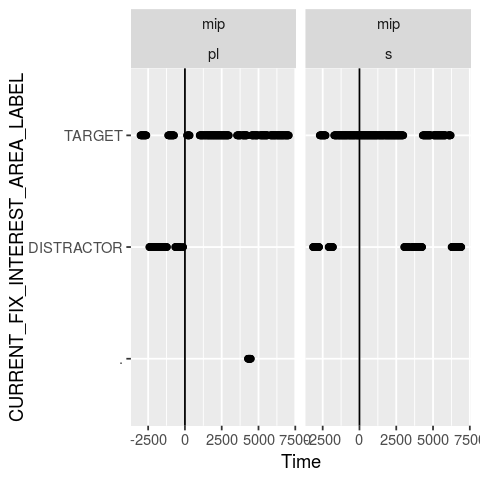

In [136]:
ggplot(subset(fixbins, s_form =='mip')) + geom_point(aes(x=Time, y=CURRENT_FIX_INTEREST_AREA_LABEL)
) + facet_wrap(~s_form * target) + geom_vline(xintercept=0,
	colour='black')

In [137]:
# just find the switches
# distribution over switches to targets vs. distractors, singulars vs. plurals

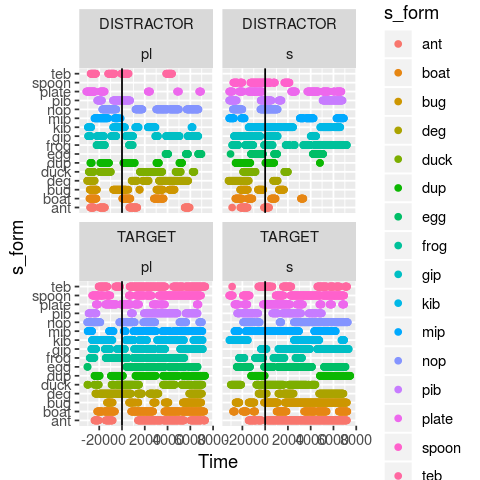

In [138]:
ggplot(subset(sm_fixbins, CURRENT_FIX_INTEREST_AREA_LABEL!='.')) + geom_point(aes(x=Time,
                                                                               y=s_form, colour=s_form)) + facet_wrap(CURRENT_FIX_INTEREST_AREA_LABEL ~ target) + geom_vline(xintercept=0, colour='black')

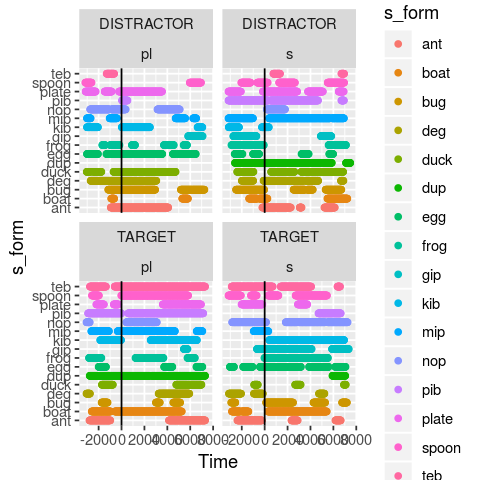

In [139]:
ggplot(subset(pl00_fixbins, CURRENT_FIX_INTEREST_AREA_LABEL!='.')) + geom_point(aes(x=Time,
    y=s_form, colour=s_form)) + facet_wrap(CURRENT_FIX_INTEREST_AREA_LABEL ~ target) + geom_vline(xintercept=0, colour='black')

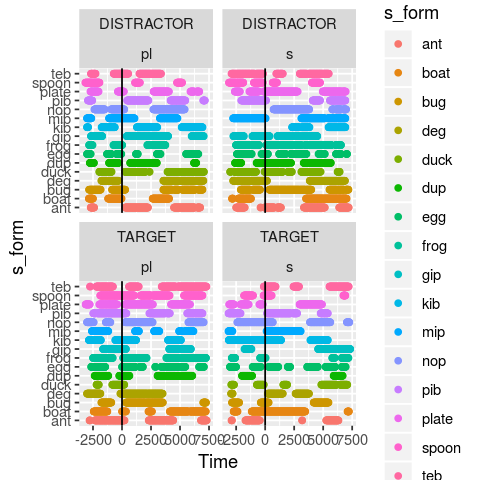

In [140]:
ggplot(subset(pl01_fixbins, CURRENT_FIX_INTEREST_AREA_LABEL!='.')) + geom_point(aes(x=Time,
    y=s_form, colour=s_form)) + facet_wrap(CURRENT_FIX_INTEREST_AREA_LABEL ~ target) + geom_vline(xintercept=0, colour='black')

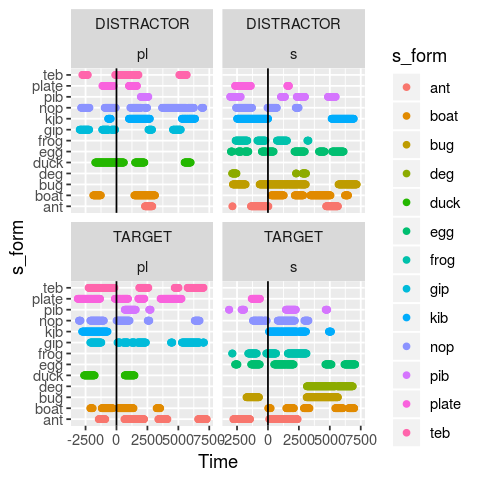

In [141]:
ggplot(subset(pl03_fixbins, CURRENT_FIX_INTEREST_AREA_LABEL!='.')) + geom_point(aes(x=Time,
    y=s_form, colour=s_form)) + facet_wrap(CURRENT_FIX_INTEREST_AREA_LABEL ~ target) + geom_vline(xintercept=0, colour='black')

In [ ]:
# [X]  does the eye tracking recording start relative to the beginning of the audio? that would explain the difference at 2500 ms
# CURRENT_FIX_INTEREST_AREA_LABEL not recorded correctly when moved from old folder to new folder
# [X] split out by singulars and plurals

# Production Data

In [70]:
p_coded = read.csv('productions_coded.csv', stringsAsFactors=F)
print(names(p_coded))
print(nrow(p_coded))

[1] "child"         "itemId"        "Lemma"         "Singular.IPA" 
[5] "Singular.Code" "Plural.IPA"    "Plural.Code"   "Comments"     
[1] 220


In [71]:
codebook = c(
    'No data (0)',
    'No verbal response (1)',
    'Not identifiable/babble (2)',
    'Other word (not noun) (3)',
    'Noun from context (4)',
    'Singular form (5)',
    'Non-conventional plural form (6)',
    'Plural form, approximate articulation (7)',
    'Plural form, adult-like articulation (8)' 
)

codes = data.frame(code = seq(0,8), description = codebook)
codes$description = factor(codes$description, levels = codebook)

In [72]:
names(p_coded)

[1] "child"         "itemId"        "Lemma"         "Singular.IPA" 
[5] "Singular.Code" "Plural.IPA"    "Plural.Code"   "Comments"

In [73]:
# get the item properties into here
pt_ds = read.csv('../PLEARN_experiments/plearn_productiveTask_datasource.csv')
p_coded = merge(p_coded, pt_ds, by.x='Lemma', by.y='s_form')
nrow(p_coded)

[1] 176

In [74]:
print(names(p_coded))
nrow(p_coded)

 [1] "Lemma"              "child"              "itemId"            
 [4] "Singular.IPA"       "Singular.Code"      "Plural.IPA"        
 [7] "Plural.Code"        "Comments"           "novel_id"          
[10] "background_context" "vowel_carrier"      "full_carrier"      
[13] "s_carrier"          "s_punct"            "s_wav_index"       
[16] "s_sentence"         "pl_form"            "pl_carrier"        
[19] "pl_punct"           "pl_wav_index"       "pl_sentence"       
[22] "novelty"            "voicing"            "simple_pl_stim"    
[25] "simple_s_stim"      "animacyStatus"      "test_index"        
[28] "trial_index"        "Trial"              "Practice"          
[31] "NovelColor"         "book"              


[1] 176

In [75]:
s_codes = aggregate(itemId ~ Singular.Code + child, p_coded, length)
names(s_codes) = c('code', 'child', 'count')
s_codes = merge(s_codes, codes)
s_codes$type ='singular'
s_codes

code child count description                               type    
1  0    pl01   1    No data (0)                               singular
2  1    pl01   3    No verbal response (1)                    singular
3  1    pl11  14    No verbal response (1)                    singular
4  1    pl05  14    No verbal response (1)                    singular
5  1    pl15   1    No verbal response (1)                    singular
6  1    pl03   3    No verbal response (1)                    singular
7  1    pl09   8    No verbal response (1)                    singular
8  2    pl01   2    Not identifiable/babble (2)               singular
9  2    pl03   1    Not identifiable/babble (2)               singular
10 2    pl15   1    Not identifiable/babble (2)               singular
11 3    pl01   3    Other word (not noun) (3)                 singular
12 3    pl10   1    Other word (not noun) (3)                 singular
13 3    pl11   2    Other word (not noun) (3)                 singular
14 3    pl16   1    Other word (not noun) (3)                 singular
15 3    pl09   1    Other word (not noun) (3)                 singular
16 3    pl04   1    Other word (not noun) (3)                 singular
17 3    pl15   1    Other word (not noun) (3)                 singular
18 3    pl14   1    Other word (not noun) (3)                 singular
19 5    pl03  11    Singular form (5)                         singular
20 5    pl01   7    Singular form (5)                         singular
21 5    pl09   7    Singular form (5)                         singular
22 5    pl05   2    Singular form (5)                         singular
23 5    pl04  15    Singular form (5)                         singular
24 5    pl15  13    Singular form (5)                         singular
25 5    pl13  16    Singular form (5)                         singular
26 5    pl10  15    Singular form (5)                         singular
27 5    pl14  14    Singular form (5)                         singular
28 5    pl16  14    Singular form (5)                         singular
29 7    pl03   1    Plural form, approximate articulation (7) singular
30 8    pl14   1    Plural form, adult-like articulation (8)  singular

In [76]:
p_codes = aggregate(itemId ~ Plural.Code + child, p_coded, length)
names(p_codes) = c('code', 'child','count')
p_codes = merge(p_codes, codes)
p_codes$type = 'plural'
p_codes

code child count description                               type  
1  0    pl01   2    No data (0)                               plural
2  1    pl01   2    No verbal response (1)                    plural
3  1    pl03   2    No verbal response (1)                    plural
4  1    pl05  12    No verbal response (1)                    plural
5  1    pl15   1    No verbal response (1)                    plural
6  1    pl11  16    No verbal response (1)                    plural
7  1    pl09  13    No verbal response (1)                    plural
8  2    pl04   1    Not identifiable/babble (2)               plural
9  2    pl01   4    Not identifiable/babble (2)               plural
10 2    pl16   1    Not identifiable/babble (2)               plural
11 2    pl03   1    Not identifiable/babble (2)               plural
12 3    pl03   5    Other word (not noun) (3)                 plural
13 3    pl01   3    Other word (not noun) (3)                 plural
14 3    pl15   1    Other word (not noun) (3)                 plural
15 4    pl03   5    Noun from context (4)                     plural
16 4    pl09   2    Noun from context (4)                     plural
17 5    pl03   2    Singular form (5)                         plural
18 5    pl04   2    Singular form (5)                         plural
19 5    pl05   2    Singular form (5)                         plural
20 5    pl14   7    Singular form (5)                         plural
21 5    pl01   4    Singular form (5)                         plural
22 5    pl09   1    Singular form (5)                         plural
23 5    pl16   3    Singular form (5)                         plural
24 5    pl15  12    Singular form (5)                         plural
25 5    pl13   1    Singular form (5)                         plural
26 6    pl05   2    Non-conventional plural form (6)          plural
27 6    pl04  12    Non-conventional plural form (6)          plural
28 6    pl10  14    Non-conventional plural form (6)          plural
29 6    pl13   1    Non-conventional plural form (6)          plural
30 6    pl16   1    Non-conventional plural form (6)          plural
31 7    pl01   1    Plural form, approximate articulation (7) plural
32 7    pl15   2    Plural form, approximate articulation (7) plural
33 7    pl16   1    Plural form, approximate articulation (7) plural
34 7    pl03   1    Plural form, approximate articulation (7) plural
35 7    pl14   4    Plural form, approximate articulation (7) plural
36 7    pl04   1    Plural form, approximate articulation (7) plural
37 8    pl13  14    Plural form, adult-like articulation (8)  plural
38 8    pl10   2    Plural form, adult-like articulation (8)  plural
39 8    pl14   5    Plural form, adult-like articulation (8)  plural
40 8    pl16  10    Plural form, adult-like articulation (8)  plural

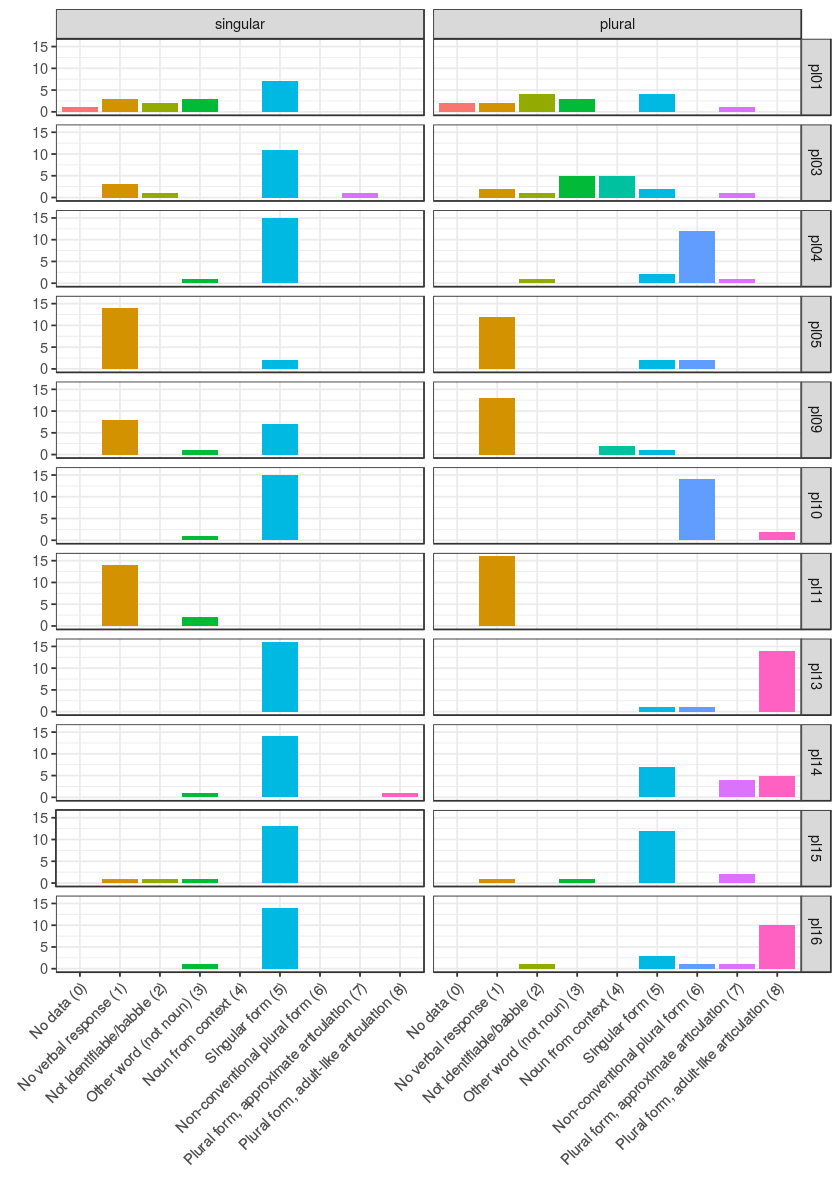

In [77]:
library('plyr')
library('ggplot2')
code_counts = rbind.fill(s_codes, p_codes)
code_counts$type = factor(code_counts$type, levels =c('singular','plural'))
options(repr.plot.width=7, repr.plot.height=10)
ggplot(code_counts) + geom_bar(aes(x=description, y=count, fill=description), stat='identity'
) + theme_bw() +theme(legend.position="none") + theme(axis.text.x = element_text(angle = 45, 
hjust = 1)) + xlab('') + ylab('') + facet_grid(child~type)

code child count description                               type  
1  0    pl01   1    No data (0)                               plural
2  1    pl03   1    No verbal response (1)                    plural
3  1    pl09   4    No verbal response (1)                    plural
4  2    pl16   1    Not identifiable/babble (2)               plural
5  2    pl04   1    Not identifiable/babble (2)               plural
6  3    pl01   2    Other word (not noun) (3)                 plural
7  3    pl03   3    Other word (not noun) (3)                 plural
8  3    pl15   1    Other word (not noun) (3)                 plural
9  4    pl03   4    Noun from context (4)                     plural
10 4    pl09   2    Noun from context (4)                     plural
11 5    pl01   3    Singular form (5)                         plural
12 5    pl03   2    Singular form (5)                         plural
13 5    pl09   1    Singular form (5)                         plural
14 5    pl04   2    Singular form (5)                         plural
15 5    pl13   1    Singular form (5)                         plural
16 5    pl14   7    Singular form (5)                         plural
17 5    pl05   2    Singular form (5)                         plural
18 5    pl15  10    Singular form (5)                         plural
19 5    pl16   3    Singular form (5)                         plural
20 6    pl13   1    Non-conventional plural form (6)          plural
21 6    pl10  13    Non-conventional plural form (6)          plural
22 6    pl16   1    Non-conventional plural form (6)          plural
23 6    pl04  11    Non-conventional plural form (6)          plural
24 7    pl03   1    Plural form, approximate articulation (7) plural
25 7    pl01   1    Plural form, approximate articulation (7) plural
26 7    pl04   1    Plural form, approximate articulation (7) plural
27 7    pl14   3    Plural form, approximate articulation (7) plural
28 7    pl15   2    Plural form, approximate articulation (7) plural
29 8    pl14   4    Plural form, adult-like articulation (8)  plural
30 8    pl13  14    Plural form, adult-like articulation (8)  plural
31 8    pl10   2    Plural form, adult-like articulation (8)  plural
32 8    pl16   9    Plural form, adult-like articulation (8)  plural

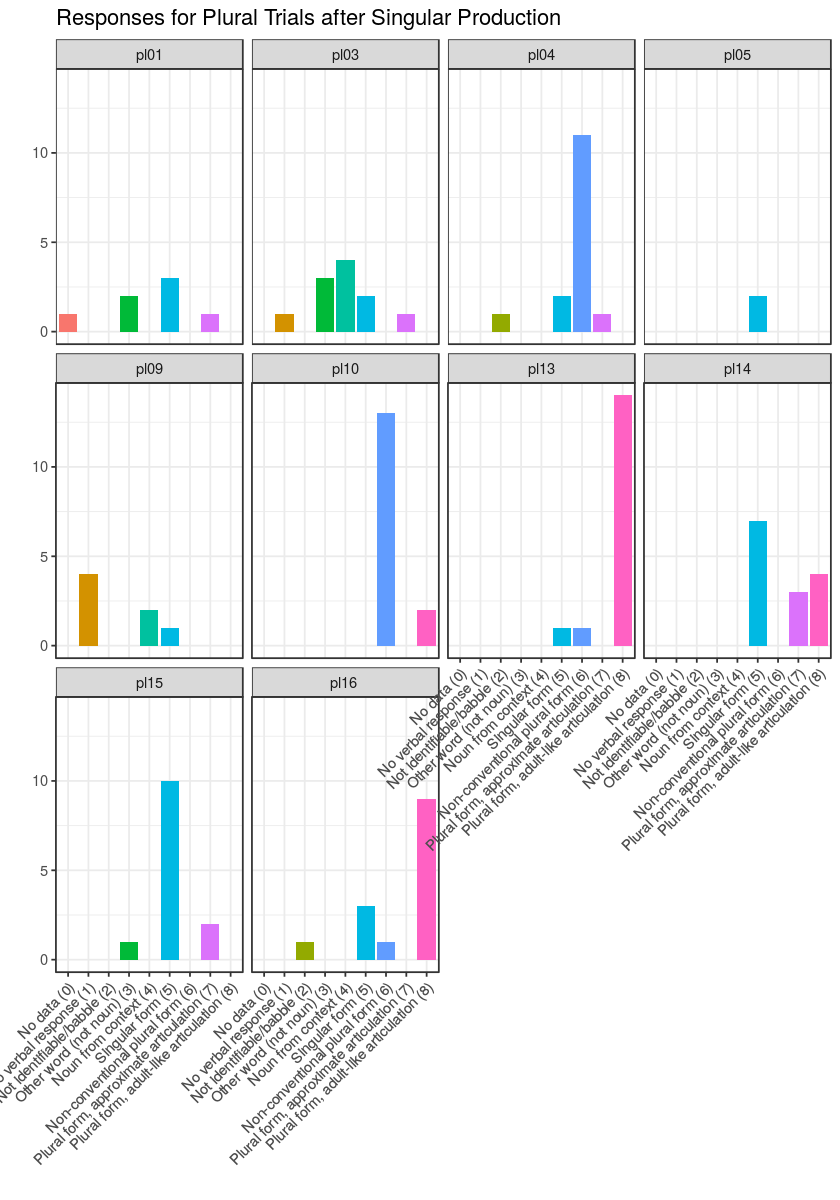

In [78]:
# coded trials after  singular productions, #5
p_codes = aggregate(itemId ~ Plural.Code + child, subset(p_coded, Singular.Code == 5), length)
names(p_codes) = c('code', 'child','count')
p_codes = merge(p_codes, codes)
p_codes$type = 'plural'
p_codes
ggplot(p_codes) + geom_bar(aes(x=description, y=count, fill=description), stat='identity'
) + theme_bw() +theme(legend.position="none") + theme(axis.text.x = element_text(angle = 45, 
hjust = 1)) + xlab('') + ylab(''
) + ggtitle('Responses for Plural Trials after Singular Production') + facet_wrap(~child)

# Logistic Regression Model for Production

In [79]:
library('lme4')

Loading required package: Matrix


In [80]:
p_coded$s_success = NA 
p_coded$s_success[p_coded$Singular.Code %in% c(5)] = 1
p_coded$s_success[p_coded$Singular.Code %in% seq(1,4)] = 0
p_coded$pl_success = NA 
p_coded$pl_success[p_coded$Plural.Code %in% c(7,8)] = 1
p_coded$pl_success[p_coded$Plural.Code %in% seq(1,6)] = 0

In [81]:
subset(p_coded, pl_success == T)

Lemma  child itemId Singular.IPA                               
1   ant    pl14  10     ant                                        
2   ant    pl16  10     I don't know what they ant                 
5   boat   pl10  6      boat splish splash                         
8   bug    pl14  1      no….bug                                    
12  cat    pl13  16     cat                                        
13  cat    pl15  16     cat                                        
19  cow    pl15  14     caow                                       
29  cup    pl13  11     cu                                         
36  deg    pl16  3      it's too (agrees to hard)                  
41  dup    pl16  12     I don't know what the dup                  
42  dup    pl14  12     dup                                        
45  egg    pl16  16     e(gh)                                      
53  fip    pl13  6      fip                                        
54  fork   pl13  10     fork                                       
63  frog   pl10  4      frog ribbit                                
65  gip    pl16  15     gip                                        
67  gip    pl14  15     gip                                        
75  gop    pl13  12     gop                                        
80  gub    pl13  9      gub                                        
84  kib    pl16  7      I don't want to say kib it's too hard      
86  kib    pl14  7      ki ba                                      
89  mip    pl14  2      mip                                        
95  nep    pl13  15     nep                                        
98  nop    pl16  5      I don't want to say nop it's so hard       
109 pib    pl16  11     I don't know what the pib it's too hard    
113 pig    pl13  7      pig                                        
120 plate  pl16  9      I don't what plate                         
122 plate  pl14  9      no… no… can't                              
123 pog    pl13  1      pog                                        
133 rabbit pl04  2      rabbit                                     
136 rabbit pl13  2      rabbit                                     
139 spoon  pl16  14     a poon. Poon. No no I can turn the pictures
140 spoon  pl14  14     soons                                      
146 star   pl13  4      star                                       
148 star   pl03  4      tar                                        
149 star   pl01  4      ya, star, twinkle twinkle                  
150 teb    pl16  8      no...I don't know… on one                  
152 teb    pl14  8      te ba                                      
155 tep    pl13  5      tep                                        
163 tig    pl13  13     tig                                        
174 truck  pl13  8      truck                                      
    Singular.Code Plural.IPA                     Plural.Code
1    5            ant(th)                        7          
2    5            two ants on… two ants… two ant 8          
5    5            two boats                      8          
8    5            bugs… more bugs                8          
12   5            two cats                       8          
13   5            cats…cat                       7          
19   5            cow(sh)                        7          
29   5            two cups                       8          
36   3            two degs                       8          
41   5            two dups                       8          
42   5            dup(th)                        7          
45   5            two eggs                       8          
53   5            two fips                       8          
54   5            two forks                      8          
63   5            two frogs                      8          
65   5            two gips                       8          
67   5            gip(th)                        7          
75   5            two gops                       8

### Singular Production

In [82]:
table(p_coded$s_success)


  0   1 
 58 114 

In [83]:
library('optimx')

In [84]:
lm = glmer(s_success~novelty+ voicing + animacyStatus + 
    (novelty + voicing + animacyStatus |child) +(1|itemId), family=binomial, data=p_coded,
 control = glmerControl(optimizer="bobyqa",optCtrl=list(maxfun=100000)))
summary(lm)

Warning message:
“'rBind' is deprecated.
 Since R version 3.2.0, base's rbind() should work fine with S4 objects”

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: s_success ~ novelty + voicing + animacyStatus + (novelty + voicing +  
    animacyStatus | child) + (1 | itemId)
   Data: p_coded
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
   179.8    227.0    -74.9    149.8      157 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9380 -0.3796  0.2167  0.3757  2.5612 

Random effects:
 Groups Name                   Variance Std.Dev. Corr          
 itemId (Intercept)            0.0000   0.0000                 
 child  (Intercept)            2.8414   1.6856                 
        noveltynovel           0.5478   0.7402   0.60          
        voicingvoiceless       0.6664   0.8163   0.38 0.97     
        animacyStatusinanimate 0.4142   0.6436   0.60 1.00 0.97
Number of obs: 172, groups:  itemId, 16; child, 11

Fixed effects:

### Plural Production

In [85]:
table(subset(p_coded, Singular.Code ==5)$pl_success)


 0  1 
76 37 

In [86]:
lm = glmer(pl_success~novelty+ voicing + animacyStatus + 
    (novelty+ voicing + animacyStatus|child) +(1|itemId), family=binomial, 
    data=subset(p_coded, Singular.Code ==5),
 control = glmerControl(optimizer="bobyqa",optCtrl=list(maxfun=100000)))

In [87]:
summary(lm)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: pl_success ~ novelty + voicing + animacyStatus + (novelty + voicing +  
    animacyStatus | child) + (1 | itemId)
   Data: subset(p_coded, Singular.Code == 5)
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
   134.1    175.0    -52.0    104.1       98 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.24247 -0.53523 -0.08618  0.44594  1.86835 

Random effects:
 Groups Name                   Variance Std.Dev. Corr          
 itemId (Intercept)             0.0000  0.0000                 
 child  (Intercept)             0.1799  0.4241                 
        noveltynovel           12.1200  3.4814   0.98          
        voicingvoiceless        0.3056  0.5528   0.92 0.98     
        animacyStatusinanimate  1.5743  1.2547   0.18 0.36 0.55
Number of obs: 113, groups:

# Age vs. Plural Knowledge

In [91]:
subj_info = read.csv('subject_info.csv')
subj_info$age_in_months = subj_info$age_in_days / 30.5
print(subj_info)

     id age_in_days gender age_in_months
1  pl00         769      F      25.21311
2  pl01         788      F      25.83607
3  pl03         810      F      26.55738
4  pl04         858      F      28.13115
5  pl05         862      F      28.26230
6  pl06          NA                   NA
7  pl07          NA                   NA
8  pl08          NA                   NA
9  pl09         796      F      26.09836
10 pl10         897      M      29.40984
11 pl11         792      M      25.96721
12 pl13        1450      M      47.54098
13 pl14        1057      M      34.65574
14 pl15         876      F      28.72131
15 pl16        1049      M      34.39344


   code            description   id age_in_days gender age_in_months count
1     0            No data (0) pl01         788      F      25.83607     2
2     0            No data (0) pl01         788      F      25.83607     1
3     1 No verbal response (1) pl01         788      F      25.83607     2
4     1 No verbal response (1) pl05         862      F      28.26230    12
5     1 No verbal response (1) pl11         792      M      25.96721    14
6     1 No verbal response (1) pl15         876      F      28.72131     1
7     1 No verbal response (1) pl05         862      F      28.26230    14
8     1 No verbal response (1) pl11         792      M      25.96721    16
9     1 No verbal response (1) pl03         810      F      26.55738     2
10    1 No verbal response (1) pl03         810      F      26.55738     3
       type
1    plural
2  singular
3    plural
4    plural
5  singular
6    plural
7  singular
8    plural
9    plural
10 singular


Warning message:
“position_stack requires non-overlapping x intervals”Warning message:
“position_stack requires non-overlapping x intervals”

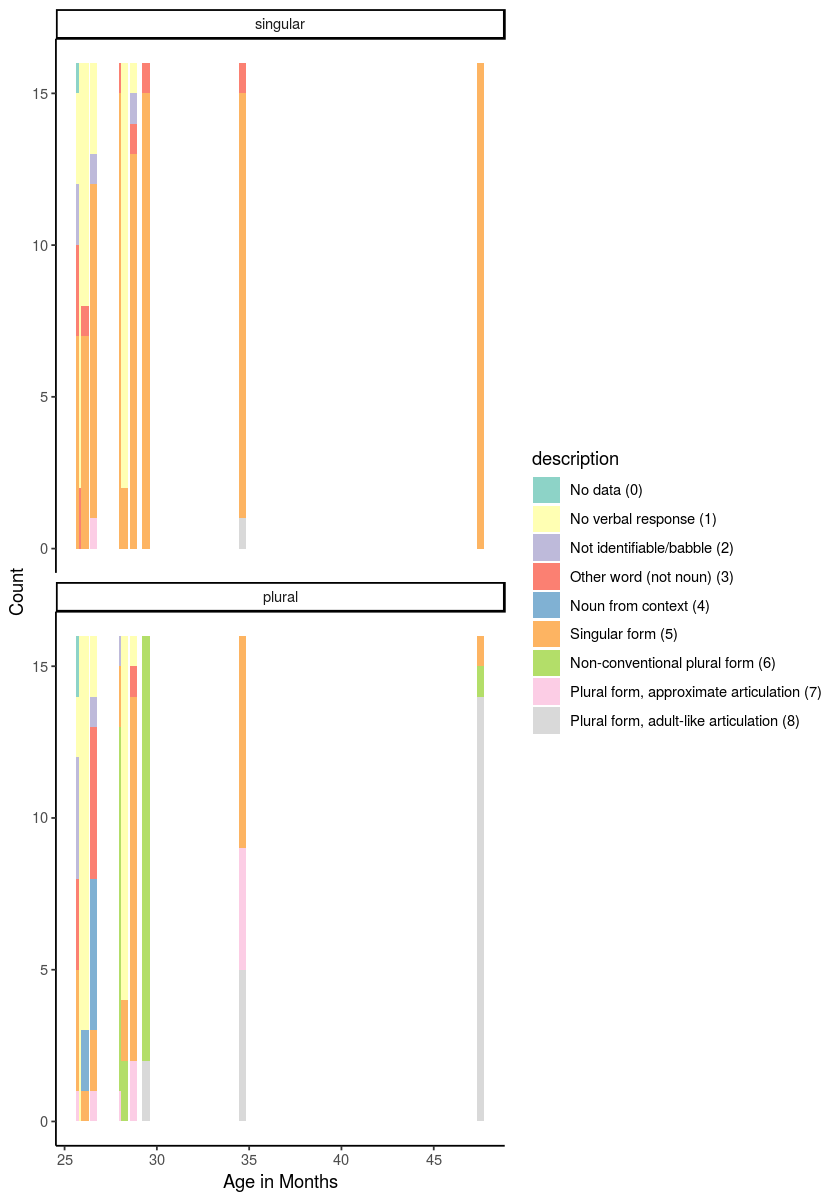

In [106]:
code_counts_with_age = merge(subj_info, code_counts, by.x='id', by.y='child')
code_counts_with_age = merge(code_counts_with_age, codes)
print(code_counts_with_age[1:10,])
ggplot(code_counts_with_age) + geom_bar(aes(x=age_in_months, y=count, fill=description),
stat="identity",  width = 0.4) + scale_fill_brewer(palette="Set3"
) + facet_wrap(~type, nrow=2) + xlab('Age in Months') + ylab('Count'
) + theme_classic() 

Compare with existing studies: 

- Zapf and Smith (2007):
- Zapf and Ettlinger (2011): for 22-35 months (m=25.8): 52% correct plurals; 33% singulars, remainder are non-answers
Experimenter says "Can you tell Teddy to get ____" and point to the singulars or the plurals. Common familiar nouns. Teddy bear picks up things or not.


# Proposed scoring methods

In [107]:
computeScores = function(codes, method = 'narrow'){
    if (method == 'narrow'){
        sum(codes %in% c(7,8)) / sum(codes %in% seq(6,8))
    } else if (method == 'broad') {
        sum(codes %in% c(7,8)) / sum(codes %in% seq(2,8))
    }
}

aggregate(Plural.Code ~ child, subset(p_coded, Singular.Code == 5), computeScores)

child Plural.Code
1  pl01  1.00000000 
2  pl03  1.00000000 
3  pl04  0.08333333 
4  pl05         NaN 
5  pl09         NaN 
6  pl10  0.13333333 
7  pl13  0.93333333 
8  pl14  1.00000000 
9  pl15  1.00000000 
10 pl16  0.90000000

In [108]:
aggregate(Plural.Code ~ child, subset(p_coded, Singular.Code == 5), function(x){computeScores(x,'broad')})

child Plural.Code
1  pl01  0.16666667 
2  pl03  0.10000000 
3  pl04  0.06666667 
4  pl05  0.00000000 
5  pl09  0.00000000 
6  pl10  0.13333333 
7  pl13  0.87500000 
8  pl14  0.50000000 
9  pl15  0.15384615 
10 pl16  0.64285714

# RT

In [111]:
metadata_cols = c('animacystatus', 'background_context','distractorimage',
'distractorloc', 'expt_index', 'full_carrier', 'novel_id', 'novelcolor',
'novelty', 'order', 'pl_carrier', 'pl_form', 'pl_punct', 'pl_sentence',
'pl_wav_index', 'practice', 's_carrier', 's_form', 's_punct',
's_sentence', 's_wav_index', 'simple_pl_stim', 'simple_s_stim', 'target',
'targetimage', 'targetloc', 'targetside', 'test_index', 'trial', 'voicing', 'vowel_carrier',
'RECORDING_SESSION_LABEL')

fixation_paths = c(
'results/smflip3_fixreport.txt',
'results/pl06_fixations.txt',    
'results/pl07_fixations.txt',    
'results/pl08_fixations.txt',
'results/pl12_fixations.txt',
'results/adultpilot_pl13_fixations.txt',
'results/adultpilot_pl14_fixations.txt',
'results/adultpilot_pl15_fixations.txt',
'results/adultpilot_pl16_fixations.txt')

In [112]:
fixreports = lapply(fixation_paths, function(fixation_path){
    gaze = blabr::fixations_report(fixation_path)
    gaze = merge(gaze, audio_timings[,c('audiotarget','disambig_time')])    
    gaze$CURRENT_FIX_END = gaze$CURRENT_FIX_END - gaze$disambig_time # 0 is now disambig time
    gaze$CURRENT_FIX_START = gaze$CURRENT_FIX_START - gaze$disambig_time
    gaze = gaze[order(gaze$TRIAL_INDEX, gaze$CURRENT_FIX_INDEX),]
    return(gaze)    
})

Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logic

In [113]:
source('PLEARN_analysis_helper.R')
test_df = do.call('rbind',lapply(fixreports, function(fixreport){
    getParticipantRTs(380, fixreport, label_colname="CURRENT_FIX_INTEREST_AREA_LABEL", metadata_cols, include_non_roi_label=T)
})) 

In [122]:
getRTComparisonPlot = function(test_df, split_var, facet_var = NULL){
    
    agg_equation = paste("rt ~", split_var)
    if (!is.null(facet_var)){
        agg_equation = paste(agg_equation, "+", facet_var)
    }
    summary_df = do.call(data.frame, aggregate(as.formula(agg_equation), data = test_df, FUN = function(x)
        c(mean = mean(x), sd = sd(x))))
    print(names(summary_df))                   
    
    options(repr.plot.width=4, repr.plot.height=4)
    p1 = ggplot(test_df) + geom_violin(mapping=aes(y=rt, x=factor(test_df[[split_var
]]), colour=factor(test_df[[split_var]]))) + theme_bw(
) + geom_errorbar(data = summary_df, mapping=aes(x=factor(summary_df[[split_var
]]), ymin =  rt.mean - rt.sd, ymax = rt.mean + rt.sd), width = 0.1, alpha=.5) + geom_errorbar(data = summary_df, mapping=aes(x=factor(summary_df[[split_var
]]), ymin =  rt.mean, ymax = rt.mean)) + theme_bw(
) + geom_hline(yintercept=0, colour='black', linetype='dashed'
) + geom_hline(yintercept=367, colour='forestgreen') + coord_flip(
ylim= c(0,2000)) + xlab(split_var) + ylab(''
) + theme(legend.position="none")
    
    if (!is.null(facet_var)){
        options(repr.plot.width=4, repr.plot.height=8)
        p1 = p1 + facet_wrap(as.formula(paste('~', facet_var, sep='')), ncol=1)
    }
    print(p1)
                                               
    p2 = ggplot(test_df) + geom_histogram(mapping=aes(x=rt, fill=factor(test_df[[split_var]]))
    ) + theme_bw() + geom_errorbarh(data = summary_df, 
    mapping=aes(y=factor(summary_df[[split_var]]), xmin =  rt.mean - rt.sd, xmax = rt.mean + rt.sd),
    width = 0.1, alpha=.5) + geom_errorbarh(data = summary_df, mapping=aes(y=factor(summary_df[[split_var
    ]]), xmin =  rt.mean, xmax = rt.mean)) + theme_bw() + geom_vline(xintercept=0, 
    colour='black', linetype='dashed') + geom_vline(xintercept=367, colour='forestgreen'
    ) + coord_cartesian(xlim= c(0,2000)) + theme(legend.position="none")
    
    if (!is.null(facet_var)){
        options(repr.plot.width=4, repr.plot.height=8)
        p2 = p2 + facet_wrap(as.formula(paste('~', facet_var, '+', split_var, sep='')), ncol=1)
    } else {
        p2 = p2 + facet_wrap(as.formula(paste('~', split_var, sep='')), ncol=1)
    }
    #print(p2)                                  
                                               
                                               
}

In [123]:
names(test_df)

[1] "rt"                      "time_to_last_nonna"     
 [3] "track_loss_at_0"         "animacystatus"          
 [5] "background_context"      "distractorimage"        
 [7] "distractorloc"           "expt_index"             
 [9] "full_carrier"            "novel_id"               
[11] "novelcolor"              "novelty"                
[13] "order"                   "pl_carrier"             
[15] "pl_form"                 "pl_punct"               
[17] "pl_sentence"             "pl_wav_index"           
[19] "practice"                "s_carrier"              
[21] "s_form"                  "s_punct"                
[23] "s_sentence"              "s_wav_index"            
[25] "simple_pl_stim"          "simple_s_stim"          
[27] "target"                  "targetimage"            
[29] "targetloc"               "targetside"             
[31] "test_index"              "trial"                  
[33] "voicing"                 "vowel_carrier"          
[35] "RECORDING_SESSION_LABEL"

[1] "RECORDING_SESSION_LABEL" "target"                 
[3] "rt.mean"                 "rt.sd"                  


Warning message:
“Removed 138 rows containing non-finite values (stat_ydensity).”Warning message:
“Ignoring unknown parameters: width”

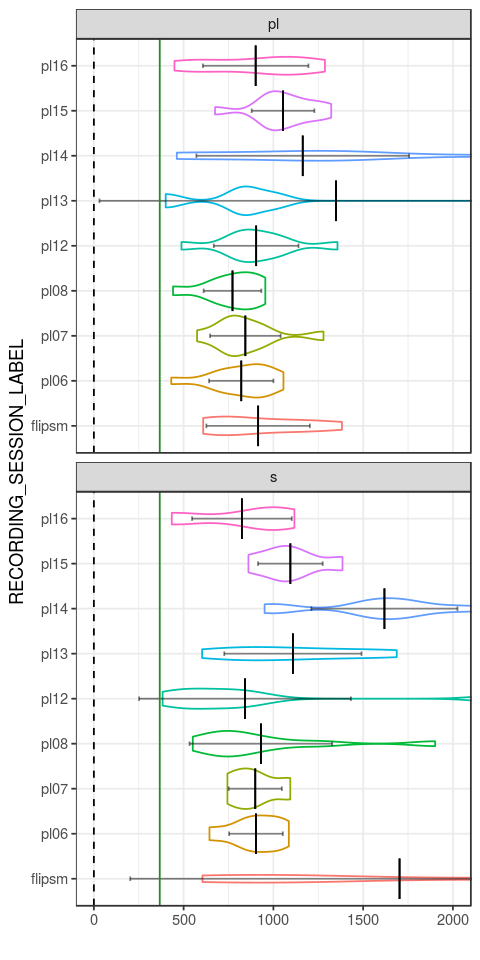

In [124]:
getRTComparisonPlot(test_df, split_var = 'RECORDING_SESSION_LABEL', facet_var='target')

[1] "target"  "rt.mean" "rt.sd"  


Warning message:
“Removed 138 rows containing non-finite values (stat_ydensity).”Warning message:
“Ignoring unknown parameters: width”

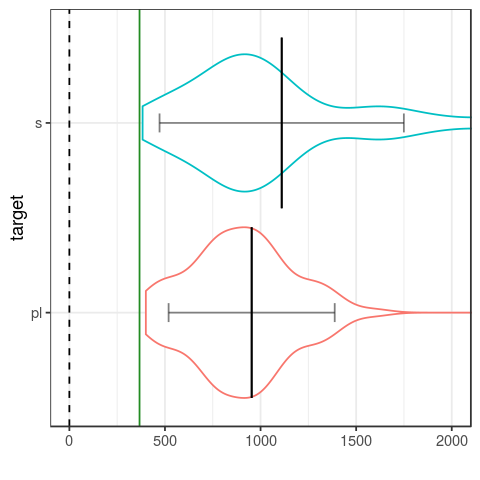

In [125]:
getRTComparisonPlot(test_df, split_var = 'target')

[1] "target"                  "RECORDING_SESSION_LABEL"
[3] "rt.mean"                 "rt.sd"                  


Warning message:
“Removed 138 rows containing non-finite values (stat_ydensity).”Warning message:
“Ignoring unknown parameters: width”

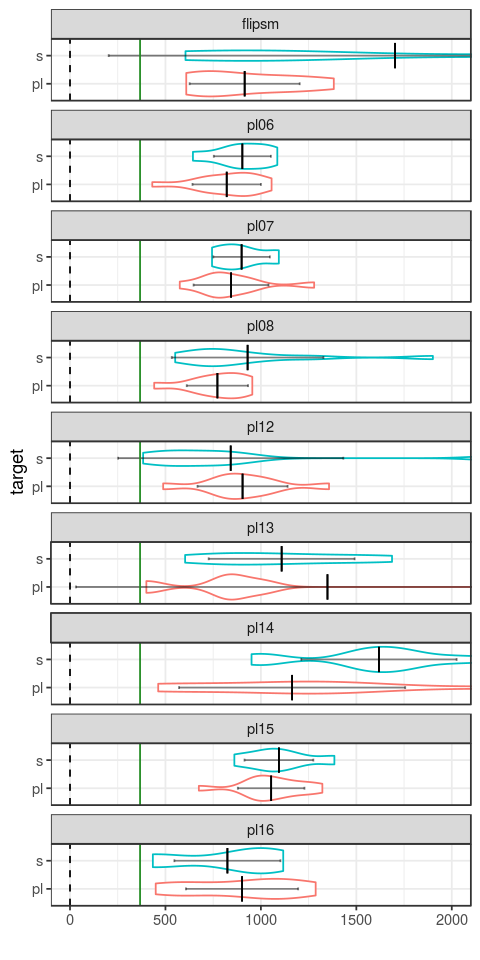

In [126]:
getRTComparisonPlot(test_df, split_var = 'target', facet_var = 'RECORDING_SESSION_LABEL')

[1] "voicing" "target"  "rt.mean" "rt.sd"  


Warning message:
“Removed 138 rows containing non-finite values (stat_ydensity).”Warning message:
“Ignoring unknown parameters: width”

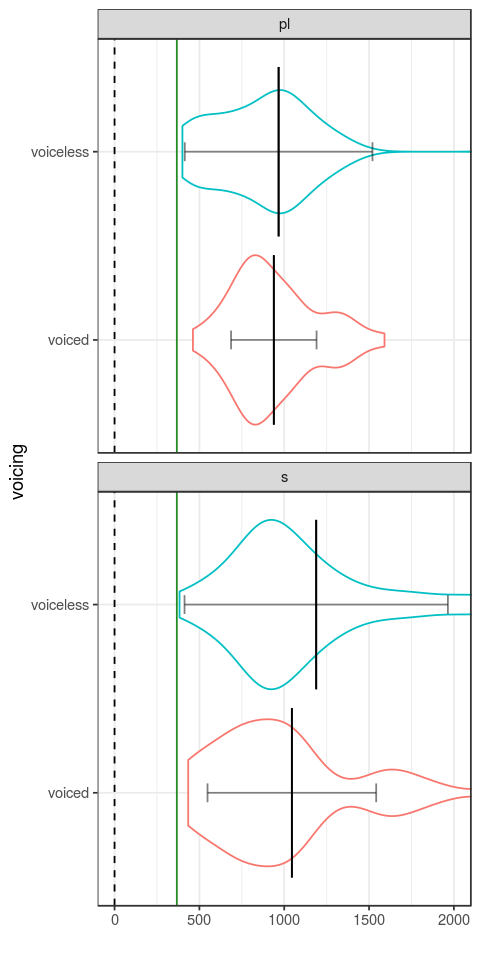

In [127]:
getRTComparisonPlot(test_df,split_var = 'voicing', facet_var='target')

[1] "novelty" "target"  "rt.mean" "rt.sd"  


Warning message:
“Removed 138 rows containing non-finite values (stat_ydensity).”Warning message:
“Ignoring unknown parameters: width”

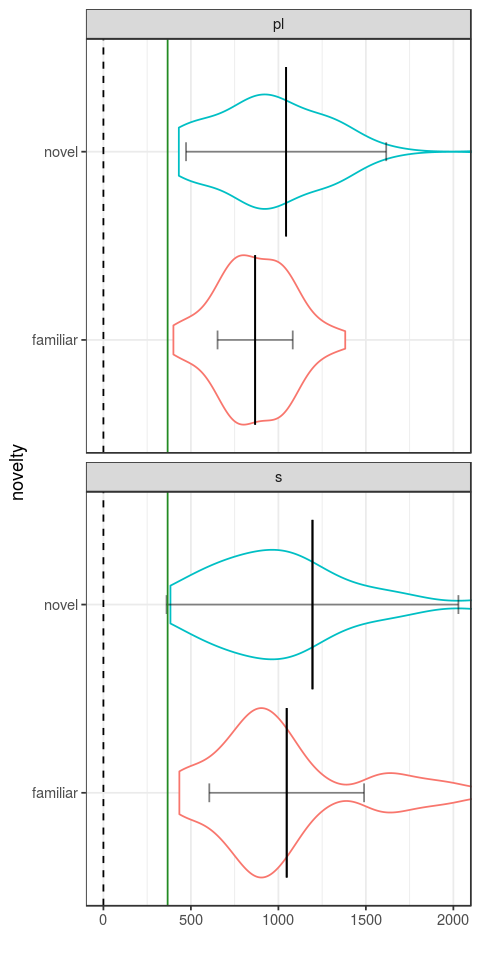

In [128]:
getRTComparisonPlot(test_df,split_var = 'novelty', facet_var='target')

[1] "animacystatus" "target"        "rt.mean"       "rt.sd"        


Warning message:
“Removed 138 rows containing non-finite values (stat_ydensity).”Warning message:
“Ignoring unknown parameters: width”

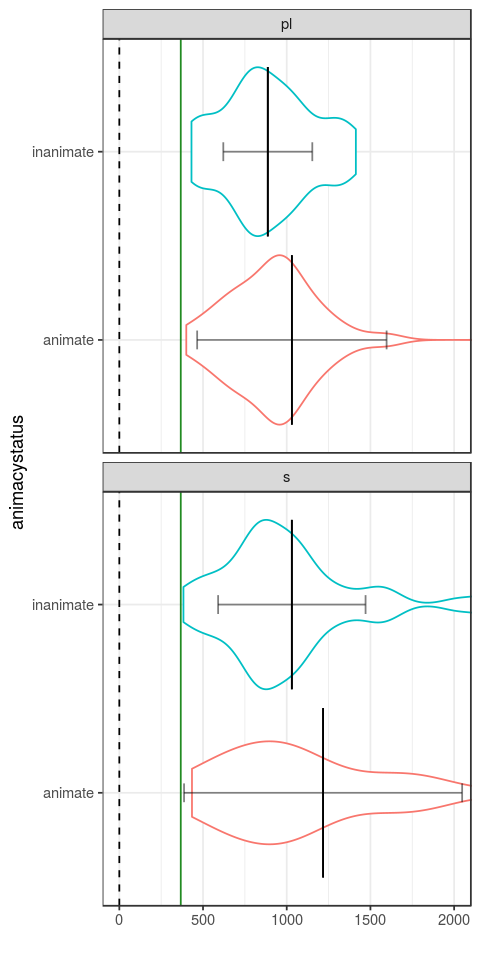

In [129]:
getRTComparisonPlot(test_df,split_var = 'animacystatus', facet_var='target')

In [130]:
names(test_df)

[1] "rt"                      "time_to_last_nonna"     
 [3] "track_loss_at_0"         "animacystatus"          
 [5] "background_context"      "distractorimage"        
 [7] "distractorloc"           "expt_index"             
 [9] "full_carrier"            "novel_id"               
[11] "novelcolor"              "novelty"                
[13] "order"                   "pl_carrier"             
[15] "pl_form"                 "pl_punct"               
[17] "pl_sentence"             "pl_wav_index"           
[19] "practice"                "s_carrier"              
[21] "s_form"                  "s_punct"                
[23] "s_sentence"              "s_wav_index"            
[25] "simple_pl_stim"          "simple_s_stim"          
[27] "target"                  "targetimage"            
[29] "targetloc"               "targetside"             
[31] "test_index"              "trial"                  
[33] "voicing"                 "vowel_carrier"          
[35] "RECORDING_SESSION_LABEL"

In [131]:
library('lme4')
lm = lmer(rt ~ novelty + voicing + animacystatus + 
    (novelty + voicing + animacystatus | RECORDING_SESSION_LABEL) +(1|s_form), data=
 test_df, )
summary(lm)

Linear mixed model fit by REML ['lmerMod']
Formula: rt ~ novelty + voicing + animacystatus + (novelty + voicing +  
    animacystatus | RECORDING_SESSION_LABEL) + (1 | s_form)
   Data: test_df

REML criterion at convergence: 2252.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8205 -0.4390 -0.0867  0.2651  6.1421 

Random effects:
 Groups                  Name                   Variance Std.Dev. Corr       
 s_form                  (Intercept)               268.5  16.39              
 RECORDING_SESSION_LABEL (Intercept)             30132.0 173.59              
                         noveltynovel            32608.1 180.58    0.71      
                         voicingvoiceless         8283.0  91.01    0.55  0.98
                         animacystatusinanimate  40658.1 201.64   -0.77 -0.99
 Residual                                       239740.7 489.63              
      
      
      
      
      
 -0.95
      
Number of obs: 150, groups:  s_form, 32; RECORDING_SES

# Preference Before Disambig

In [132]:
beforeafter_disambig_df = subset(adult_fixbins_coded, 
    CURRENT_FIX_INTEREST_AREA_LABEL %in% c('TARGET','DISTRACTOR'))
beforeafter_disambig_df$looking_at_plural = 0
beforeafter_disambig_df$looking_at_plural[
    beforeafter_disambig_df$CURRENT_FIX_INTEREST_AREA_LABEL == 'TARGET' & 
    beforeafter_disambig_df$target == 'pl'] = 1
beforeafter_disambig_df$looking_at_plural[
    beforeafter_disambig_df$CURRENT_FIX_INTEREST_AREA_LABEL == 'DISTRACTOR' & 
    beforeafter_disambig_df$target == 's'] = 1
beforeafter_disambig_df$beforeafter = 'After Disambiguation'
beforeafter_disambig_df$beforeafter[beforeafter_disambig_df$Time < 367] = 'Before Disambiguation'
beforeafter_disambig_preference = aggregate(looking_at_plural ~ participant_name + beforeafter + TRIAL_INDEX, 
    beforeafter_disambig_df, mean)

beforeafter_disambig_by_subject = do.call(data.frame, aggregate(looking_at_plural ~ participant_name +  beforeafter, beforeafter_disambig_preference, FUN = function(x){c(mean=mean(x), sd = sd(x))}))                                       

print(beforeafter_disambig_by_subject)

            participant_name           beforeafter looking_at_plural.mean
1  adultpilot_pl13_fixations  After Disambiguation              0.5158088
2  adultpilot_pl14_fixations  After Disambiguation              0.5038737
3  adultpilot_pl15_fixations  After Disambiguation              0.4857293
4  adultpilot_pl16_fixations  After Disambiguation              0.4912726
5             pl06_fixations  After Disambiguation              0.5088005
6             pl07_fixations  After Disambiguation              0.4915883
7             pl08_fixations  After Disambiguation              0.5117331
8             pl12_fixations  After Disambiguation              0.5042678
9          smflip3_fixreport  After Disambiguation              0.5012732
10 adultpilot_pl13_fixations Before Disambiguation              0.5649460
11 adultpilot_pl14_fixations Before Disambiguation              0.5002115
12 adultpilot_pl15_fixations Before Disambiguation              0.5110441
13 adultpilot_pl16_fixations Before Di

In [133]:
beforeafter_disambig_by_subject$looking_at_plural_low = 
    beforeafter_disambig_by_subject$looking_at_plural.mean - beforeafter_disambig_by_subject$looking_at_plural.sd
beforeafter_disambig_by_subject$looking_at_plural_high = 
    beforeafter_disambig_by_subject$looking_at_plural.mean + beforeafter_disambig_by_subject$looking_at_plural.sd

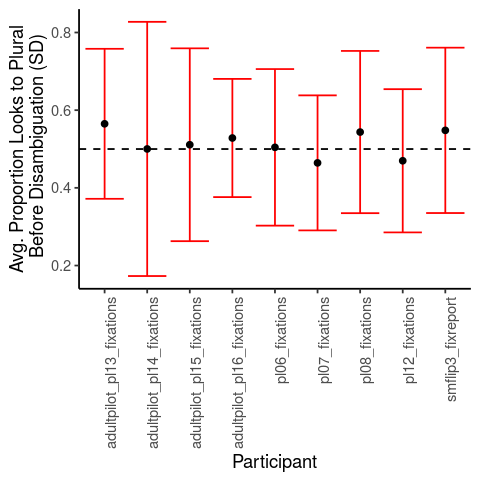

In [134]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(subset(beforeafter_disambig_by_subject, beforeafter == "Before Disambiguation"
)) + geom_errorbar(aes(x=participant_name, ymin= looking_at_plural_low,
 ymax= looking_at_plural_high), color='red') + geom_point(aes(x=participant_name, 
y=looking_at_plural.mean)) + theme_classic() + geom_hline(yintercept=.5, linetype = 'dashed'
) + xlab('Participant') + ylab('Avg. Proportion Looks to Plural\n Before Disambiguation (SD)'
) + theme(axis.text.x = element_text(angle = 90, hjust = 1))


In [ ]:
# should the last fix before disambig be excluded
#[X] Confirm that 0 is the point of disambig for everyone
#[X] propagate the information about the trials
#[X] Make sure that my ordering is doing the right thing
#[X] how to account for the 200 ms exclusion
#[X] have a bit of a buffer on either side of 0 in case there’s an NA instead of a 0/1 in that exact timebin
#    -- so far this is just looking backwards
#[ ] need to recompute wrt the beginning of the /s/ or /z/ segment, not the end